In [1]:
pwd

'/Users/macbookpro/Dropbox/Galvanize/autoregression/testing'

In [3]:
import sys 
import os
import autoregression
from autoregression import cleandata, galgraphs
import importlib
import warnings
# warnings.filterwarnings('ignore')

# indians diabetes

## Continuous

In [4]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import auc, roc_curve
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pandas.read_csv(url, names=names)
array = df.values
df = cleandata.rename_columns(df)
df.head(3)
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
galgraphs.__name__

'autoregression.galgraphs'

In [6]:
np.logspace(start=-5, stop=5, num=5)

array([  1.00000000e-05,   3.16227766e-03,   1.00000000e+00,
         3.16227766e+02,   1.00000000e+05])

MAKE SUBSAMPLE TIME: 9.059906005859375e-06
CLEAN_DF TIME: 0.031951904296875


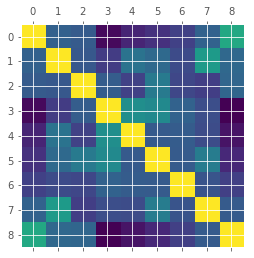

PLOT CORRELATION TIME: 0.35683107376098633


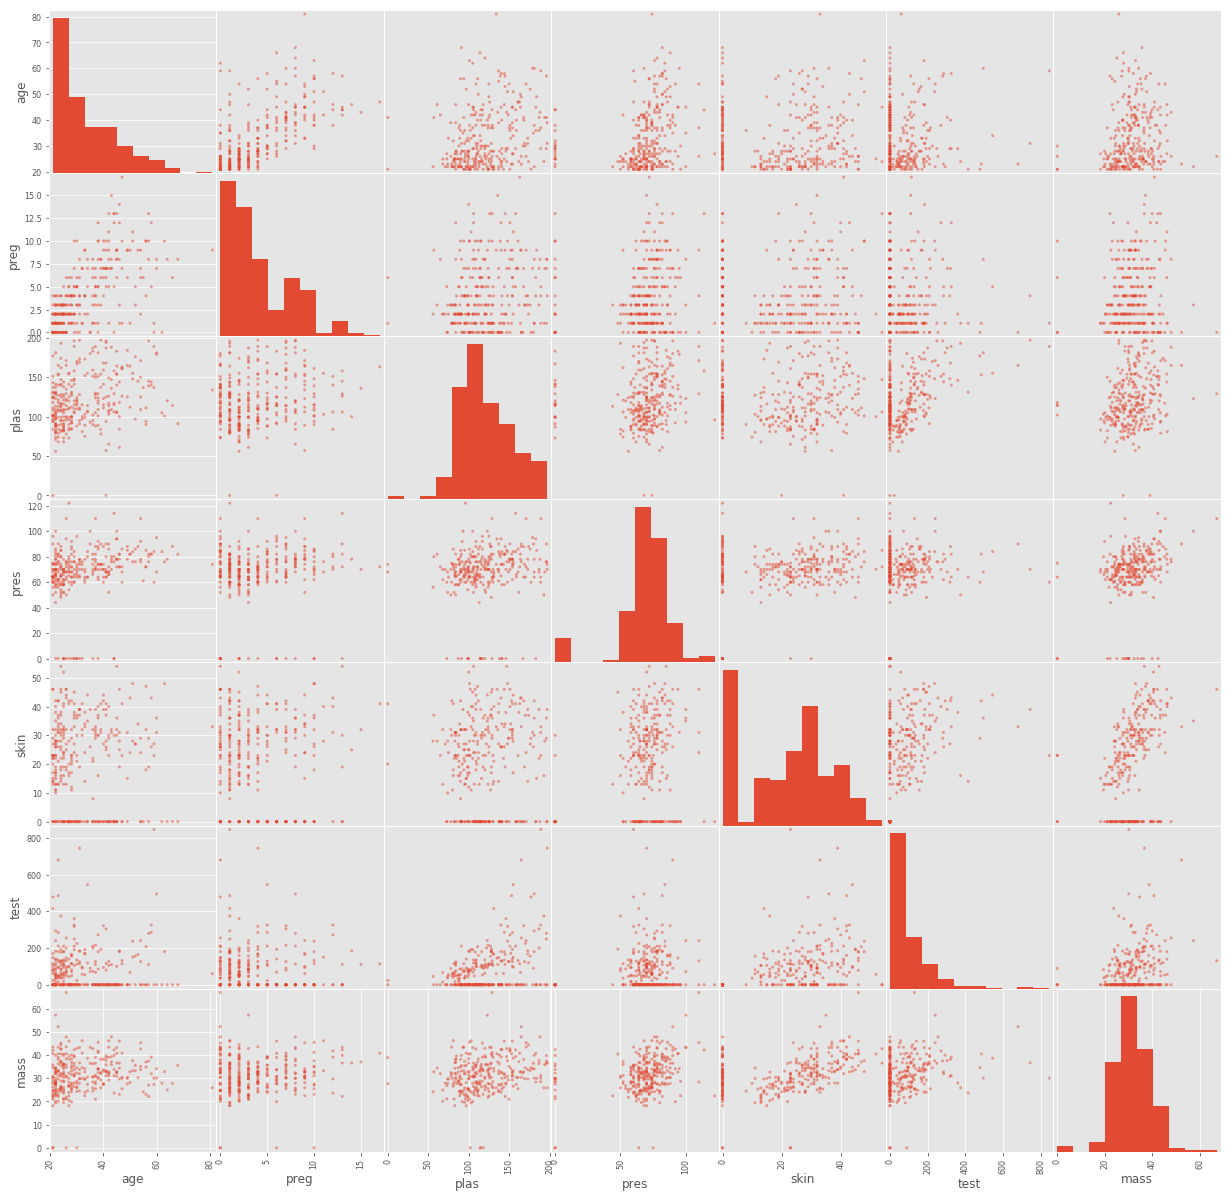

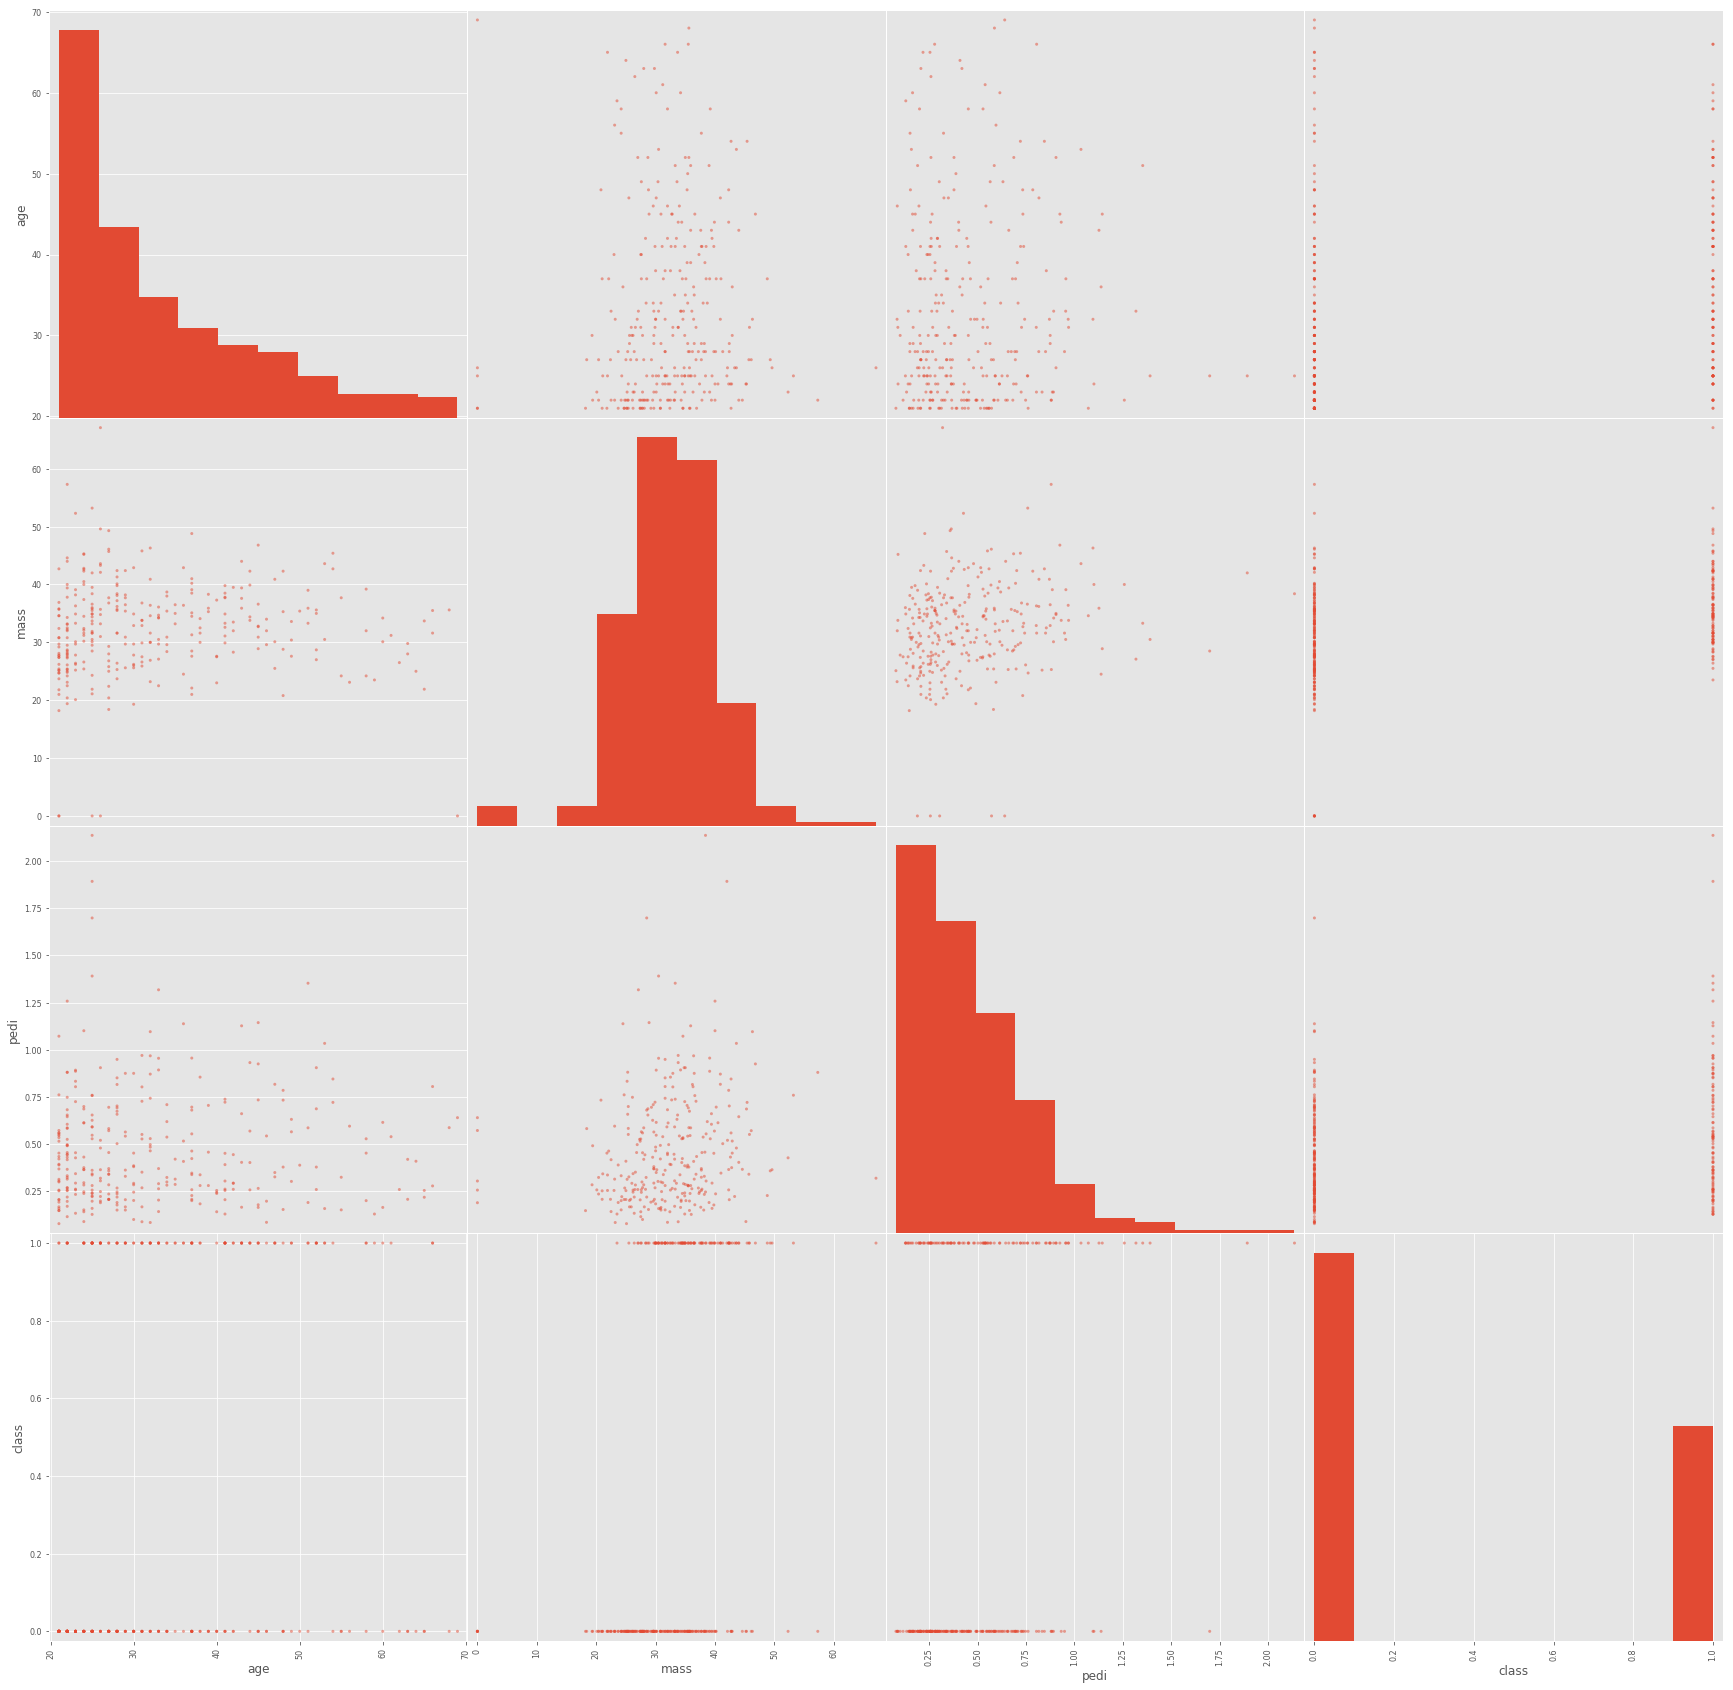

  0%|          | 0/6 [00:00<?, ?it/s]

MAKE SCATTER TIME: 11.033467292785645

DF COLUMNS: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class', 'age']

DF COLUMNS AFTER TRANSFORM: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class', 'age']

52
Y VARIABLE: "age" IS CONTINUOUS

RR: mean=-89.183559 std=16.907061
CV CALC TIME: 0.06334495544433594


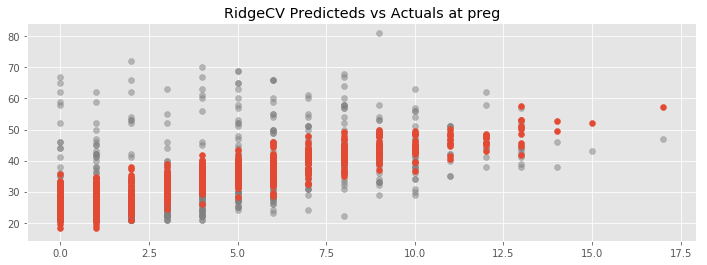

PLOT PREDICTED VS ACTUALS TIME: 0.40456390380859375


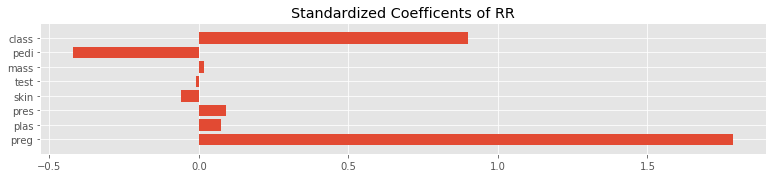

PLOT COEFFICIANTS TIME: 0.27785181999206543


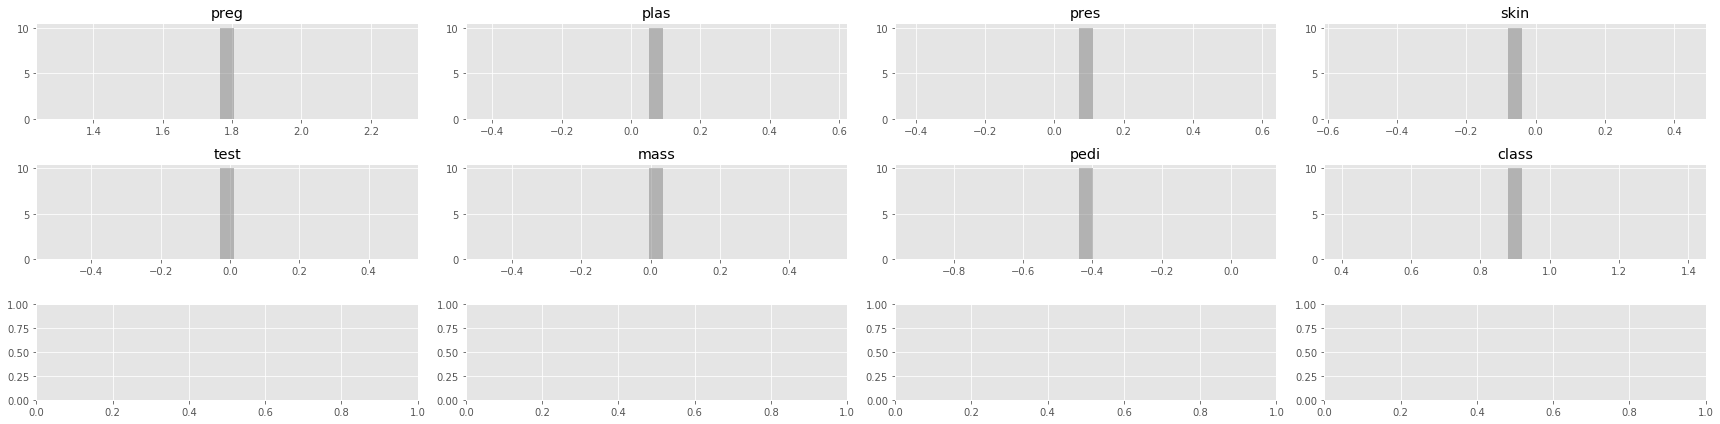

PLOT BOOTSTRAP COEFFICIANTS TIME: 3.942518949508667


ValueError: shapes (250,32) and (8,) not aligned: 32 (dim 1) != 8 (dim 0)

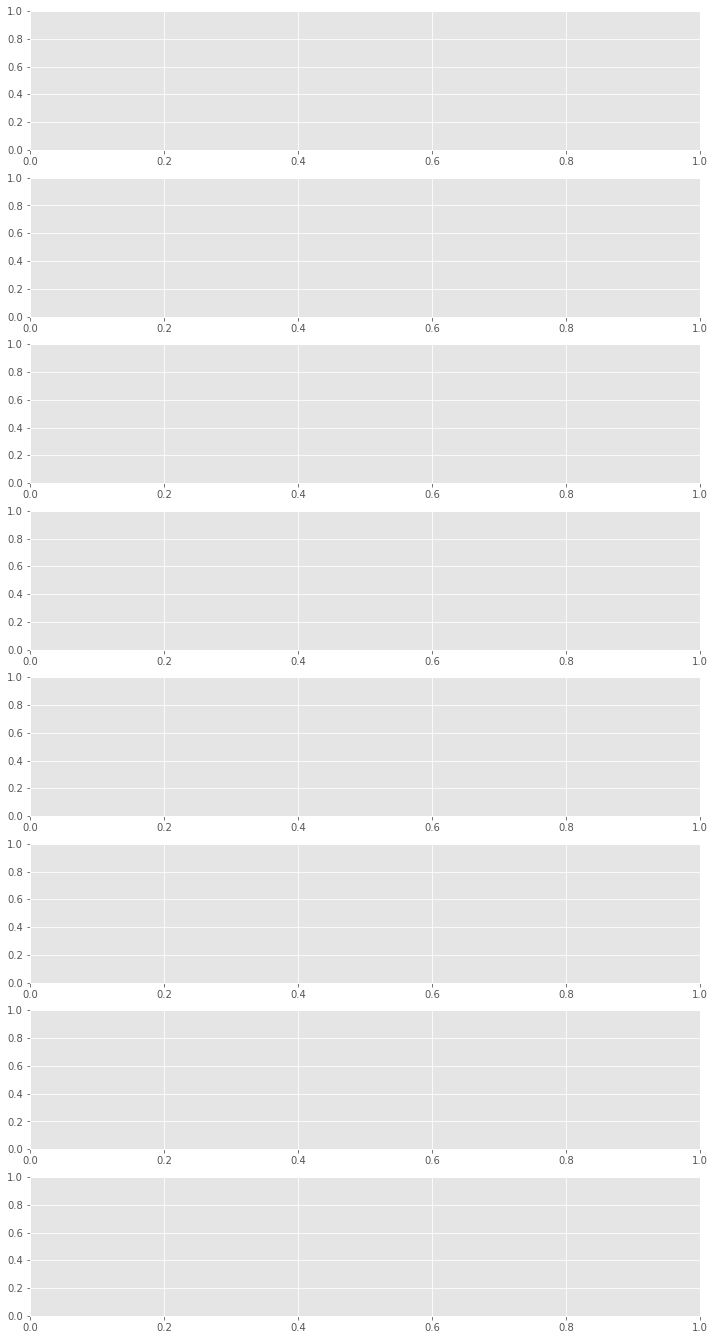

In [14]:
names1, results1, models1, pipeline1 = autoregression.compare_predictions(df,'age') # , univariates=False)

In [11]:
ridge_regularization_strengths = np.logspace(np.log10(0.000001), np.log10(100000000), num=100)
ridge_regressions = []
y=df['age']
df_X = df.drop('age', axis=1)
for alpha in ridge_regularization_strengths:
    ridge = Ridge(alpha=alpha)
    ridge.fit(df_X, y)
    ridge_regressions.append(ridge)

In [8]:
def plot_solution_paths(ax, regressions):
    alphas = [np.log10(ridge.alpha) for ridge in regressions]
    coeffs = np.concatenate([ridge.coef_.reshape(1, -1) 
                             for ridge in regressions])
    for idx in range(coeffs.shape[1]):
        ax.plot(alphas, coeffs[:, idx])
    ax.set_xlabel(r"$\log_{10}(\alpha)$")
    ax.set_ylabel("Estiamted Coefficient")
    ax.set_title("Coefficient Paths")

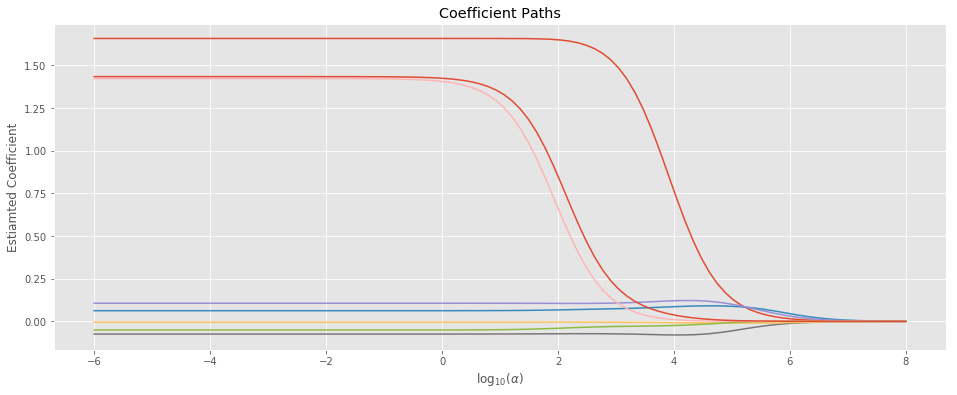

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
plot_solution_paths(ax, ridge_regressions)

## Categorical

MAKE SUBSAMPLE TIME: 7.867813110351562e-06
CLEAN_DF TIME: 0.01030278205871582


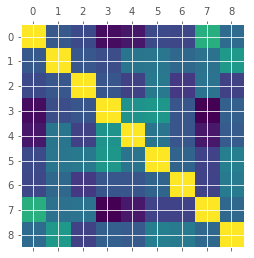

PLOT CORRELATION TIME: 0.1467268466949463


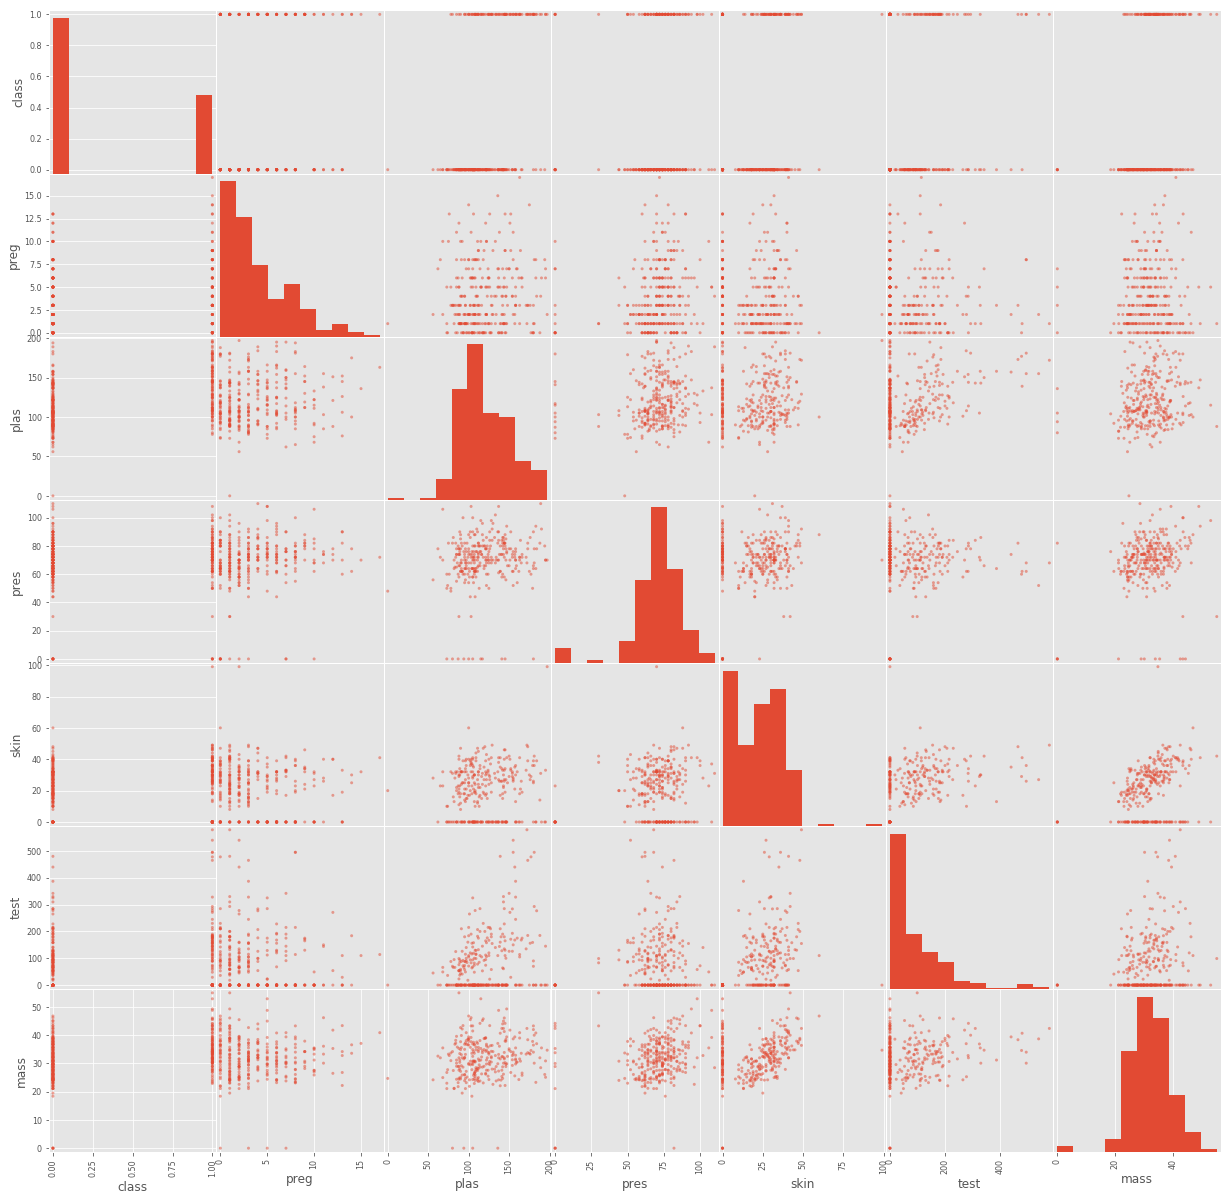

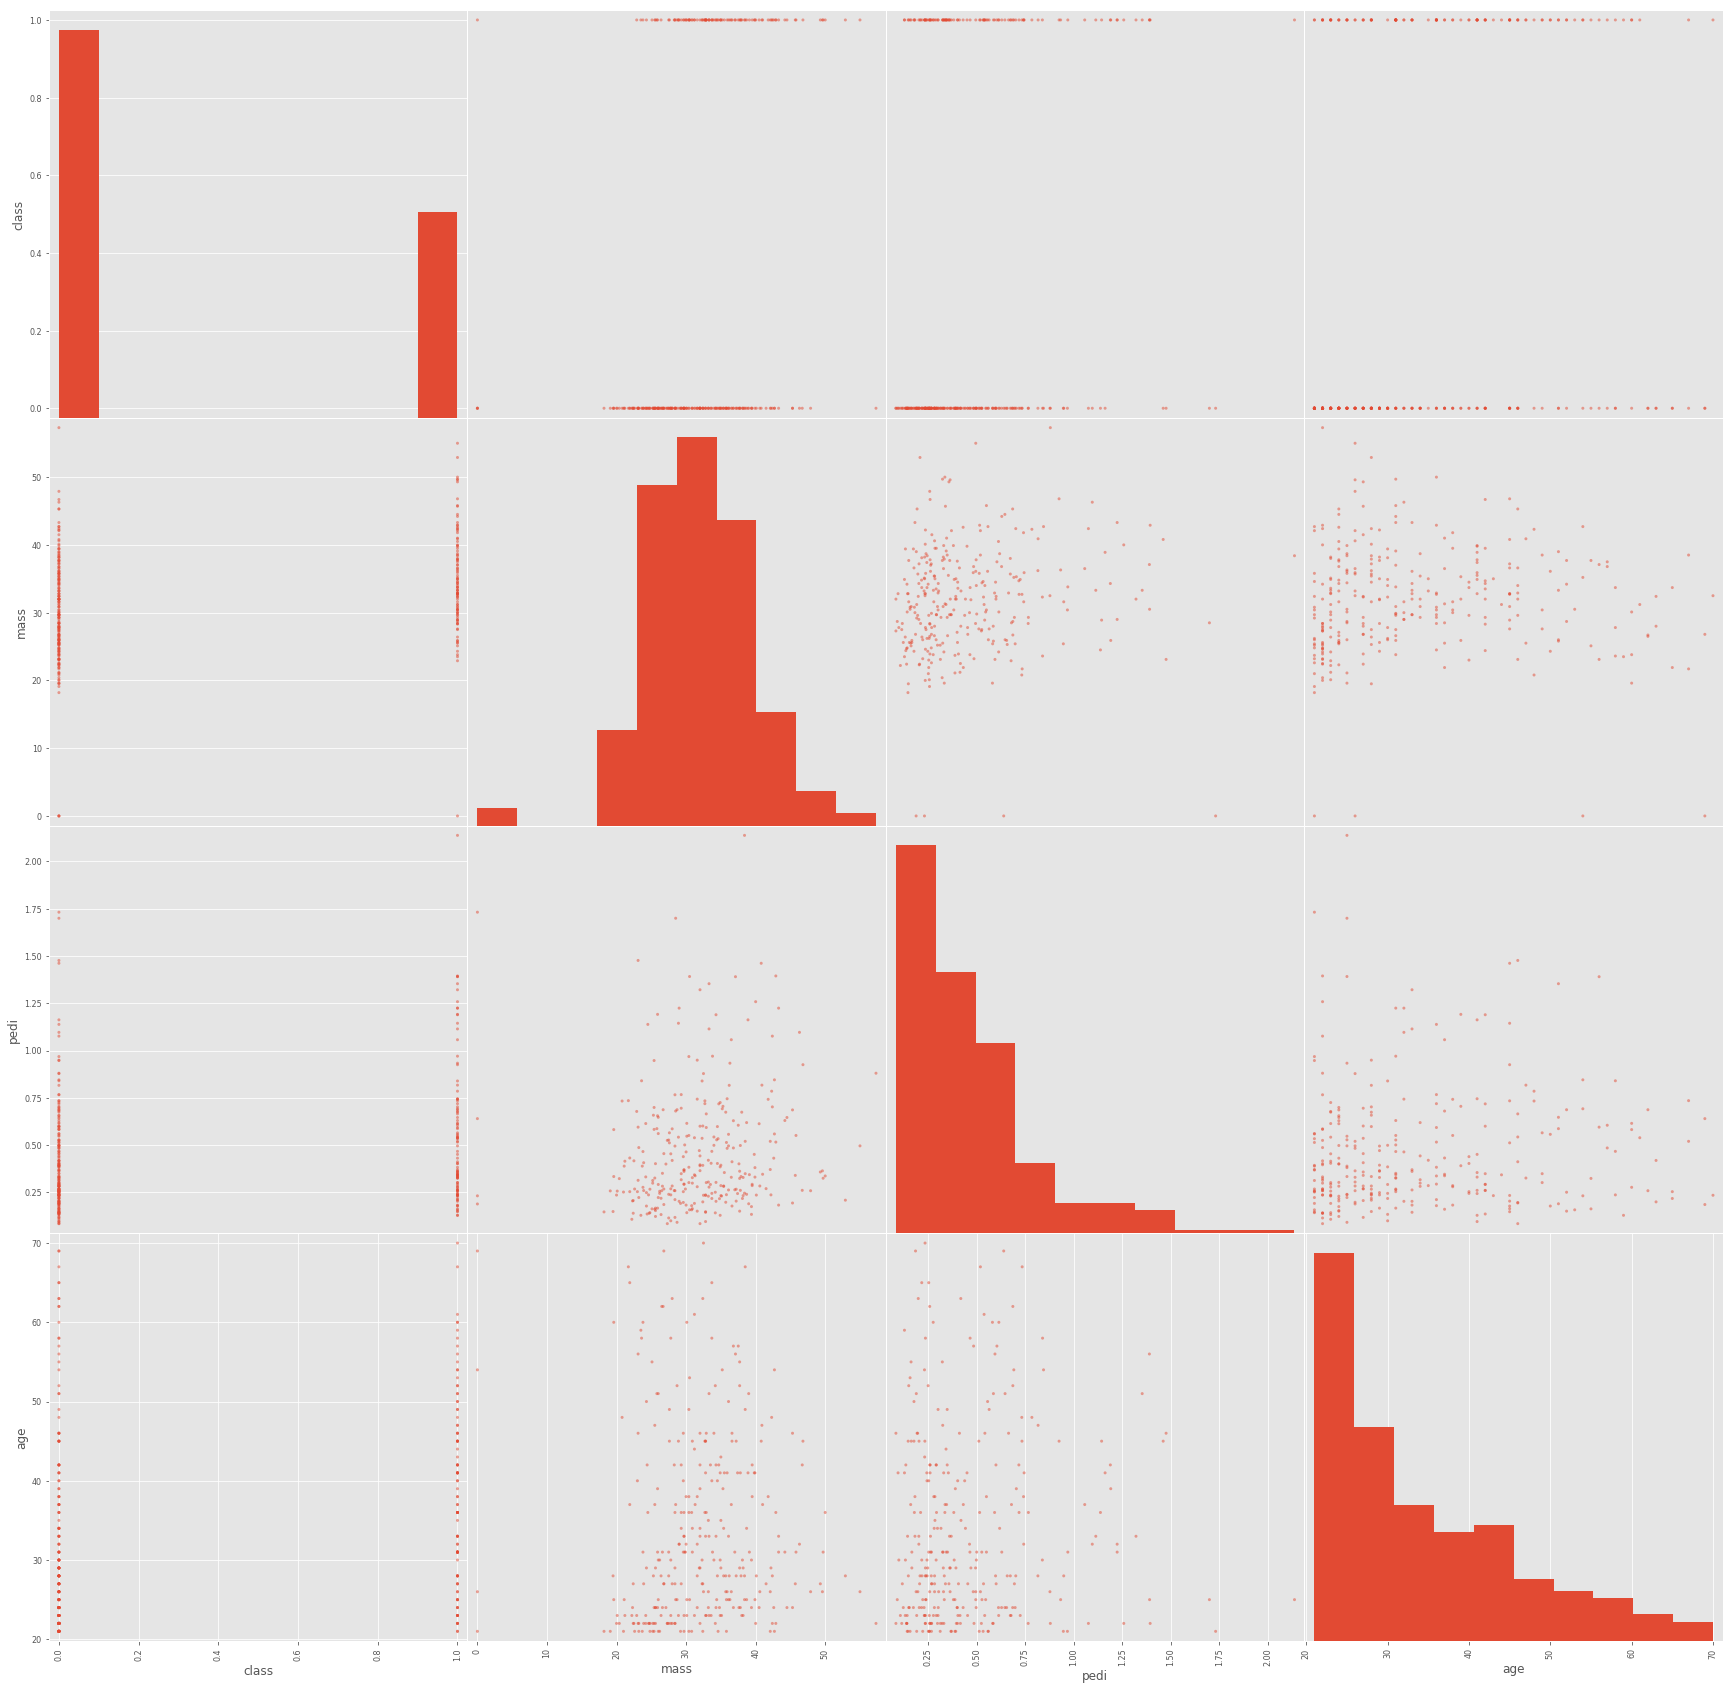

  0%|          | 0/6 [00:00<?, ?it/s]

MAKE SCATTER TIME: 6.792287111282349

DF COLUMNS: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

DF COLUMNS AFTER TRANSFORM: 
['preg_spline_linear', 'preg_spline_0', 'preg_spline_1', 'preg_spline_2', 'plas_spline_linear', 'plas_spline_0', 'plas_spline_1', 'plas_spline_2', 'pres_spline_linear', 'pres_spline_0', 'pres_spline_1', 'pres_spline_2', 'skin_spline_linear', 'skin_spline_0', 'skin_spline_1', 'skin_spline_2', 'test_spline_linear', 'test_spline_0', 'test_spline_1', 'test_spline_2', 'mass_spline_linear', 'mass_spline_0', 'mass_spline_1', 'mass_spline_2', 'pedi_spline_linear', 'pedi_spline_0', 'pedi_spline_1', 'pedi_spline_2', 'age_spline_linear', 'age_spline_0', 'age_spline_1', 'age_spline_2', 'class']

2
Y VARIABLE: "class" IS CONTINUOUS

RR: mean=-0.161661 std=0.029874
CV CALC TIME: 0.049456119537353516


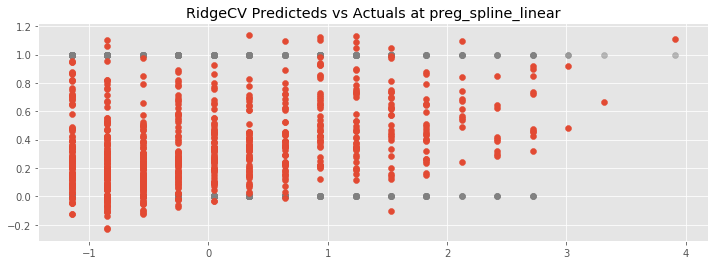

PLOT PREDICTED VS ACTUALS TIME: 0.27202606201171875


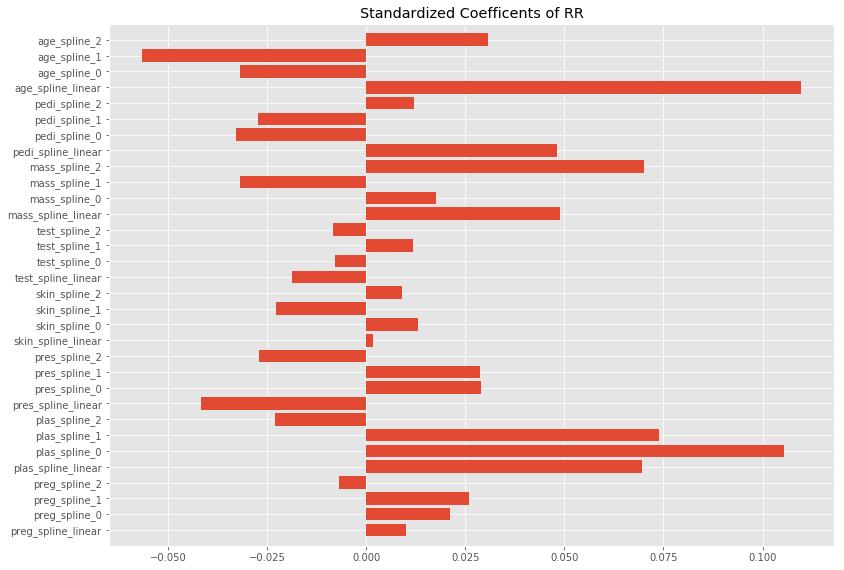

PLOT COEFFICIANTS TIME: 0.6084983348846436


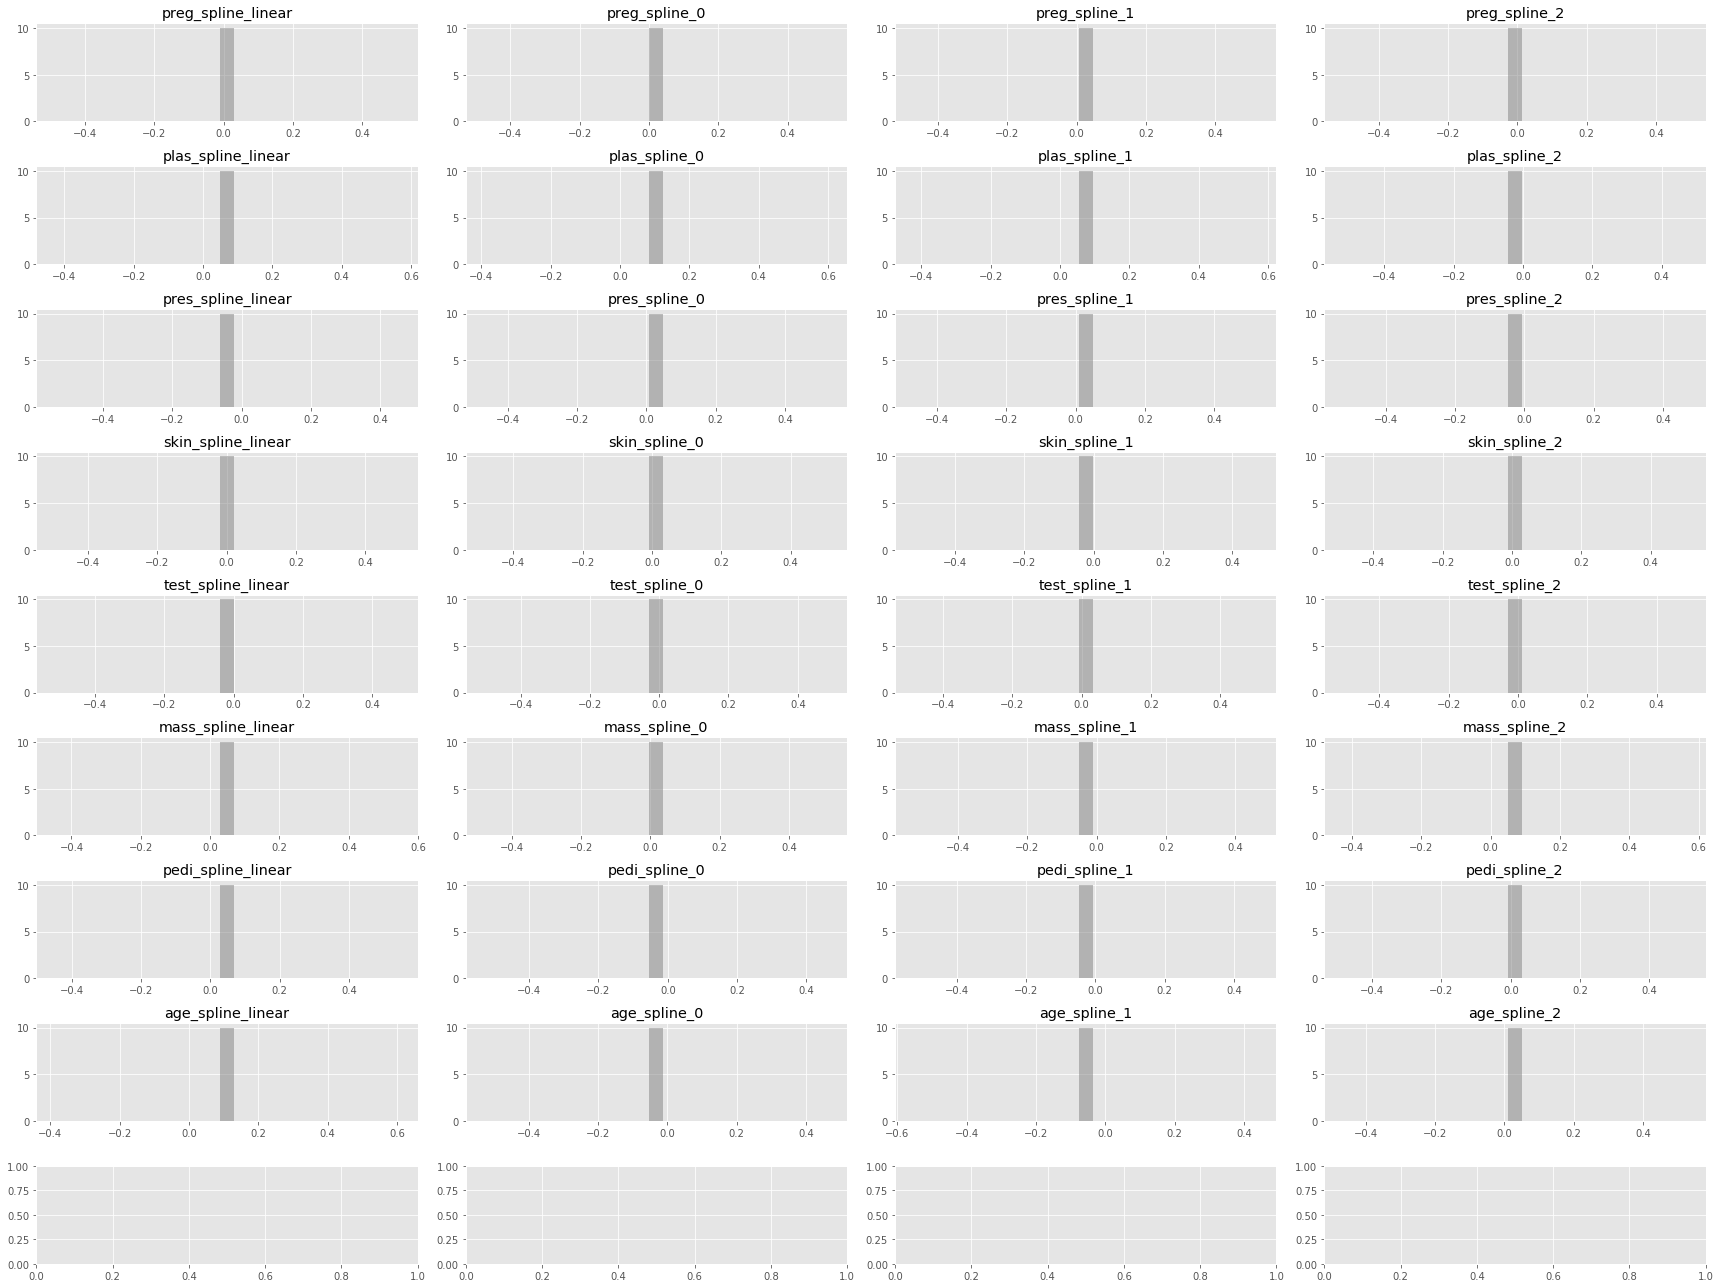

PLOT BOOTSTRAP COEFFICIANTS TIME: 5.774870157241821


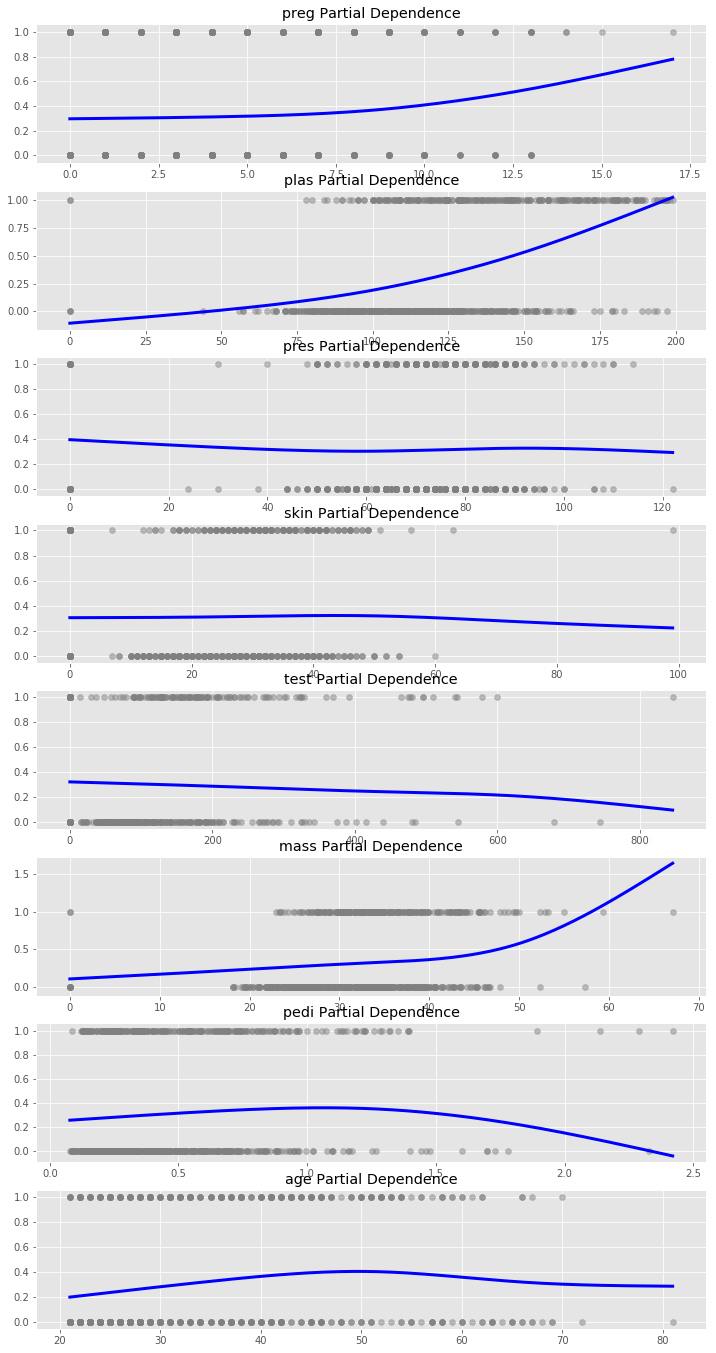

 17%|█▋        | 1/6 [00:15<01:15, 15.08s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 8.208284139633179
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.007095813751220703
len(y) != len(y_hat), so no regressions included
RR: MSE = 0.1551629377040996
LASSO: mean=-0.159162 std=0.026263
CV CALC TIME: 0.12625503540039062


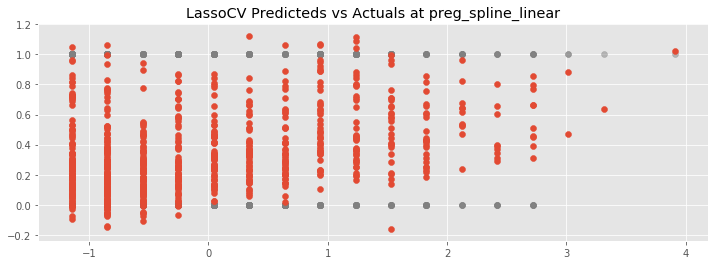

PLOT PREDICTED VS ACTUALS TIME: 0.2664487361907959


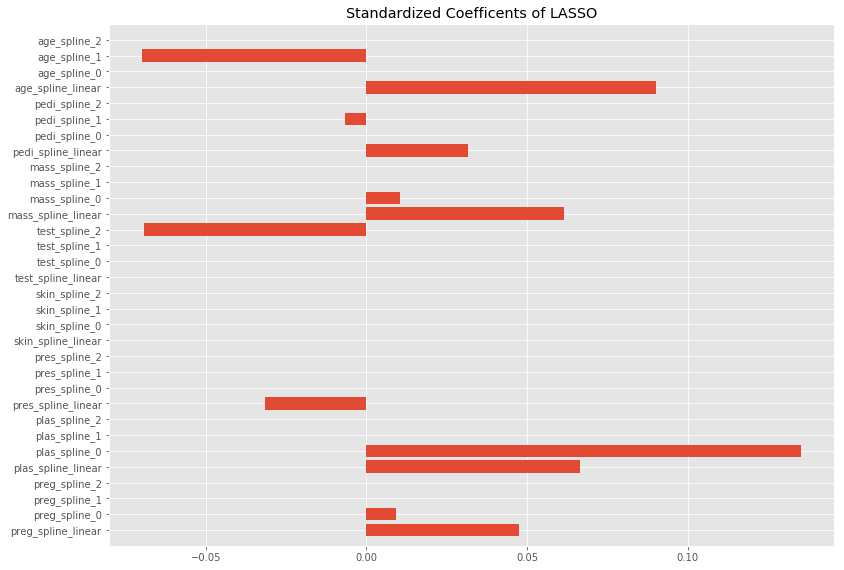

PLOT COEFFICIANTS TIME: 0.7100317478179932


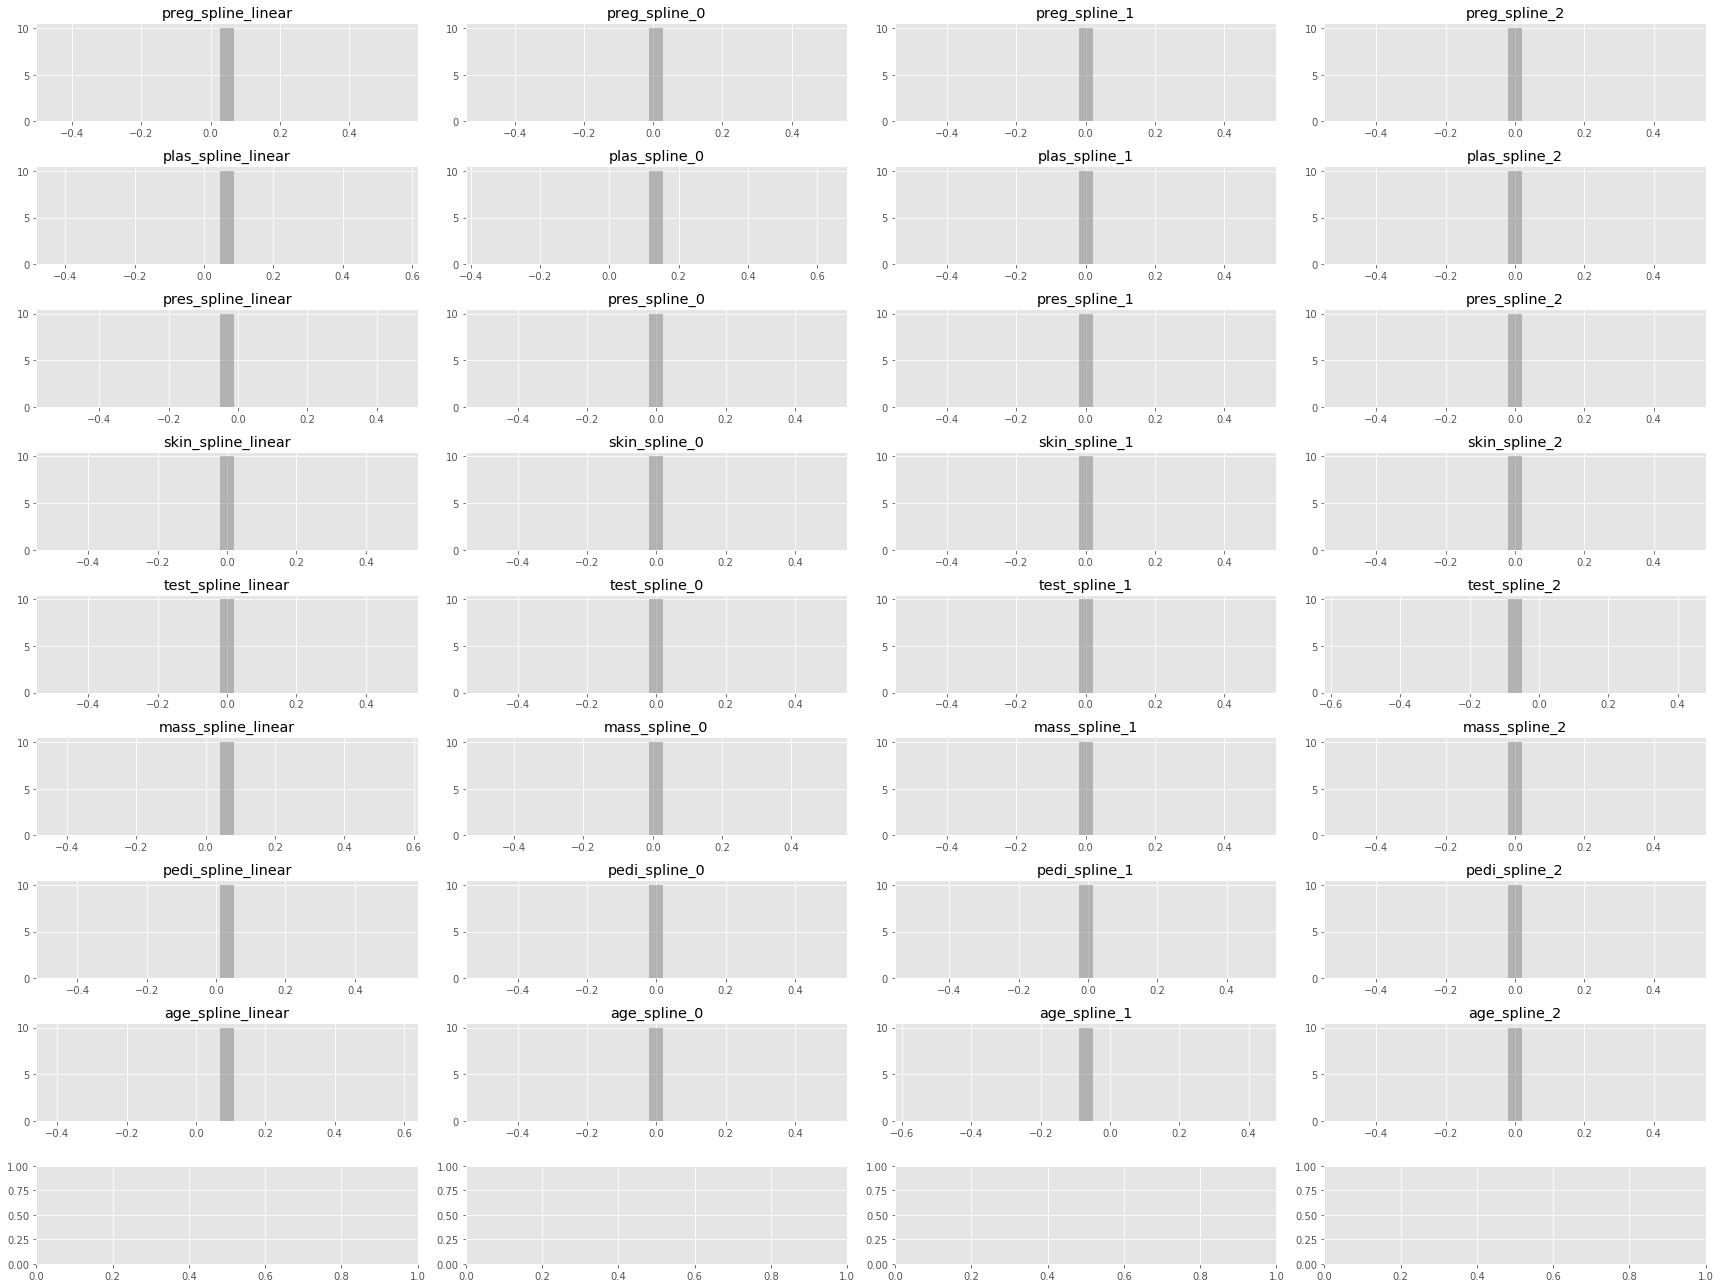

PLOT BOOTSTRAP COEFFICIANTS TIME: 5.944124221801758


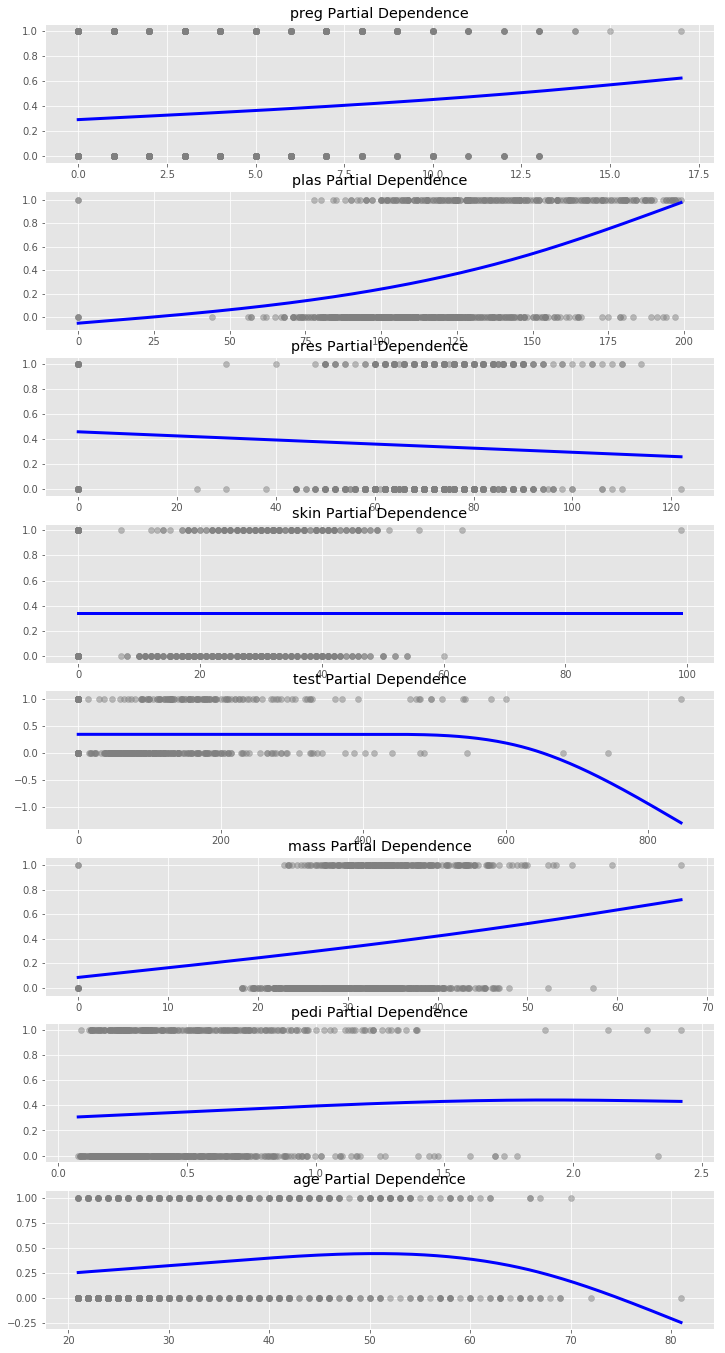

 33%|███▎      | 2/6 [00:30<01:00, 15.13s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.931157827377319
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.004266023635864258
len(y) != len(y_hat), so no regressions included
LASSO: MSE = 0.1553941192216858
DT: mean=-0.294344 std=0.060502
CV CALC TIME: 0.09340381622314453


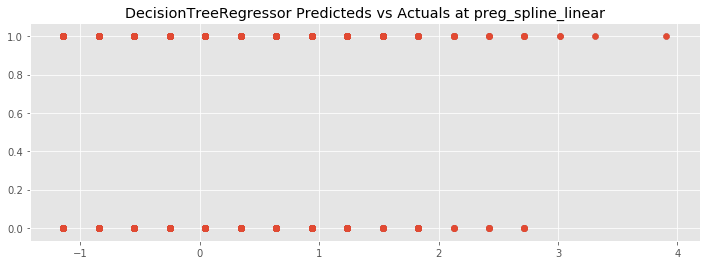

PLOT PREDICTED VS ACTUALS TIME: 0.2527649402618408


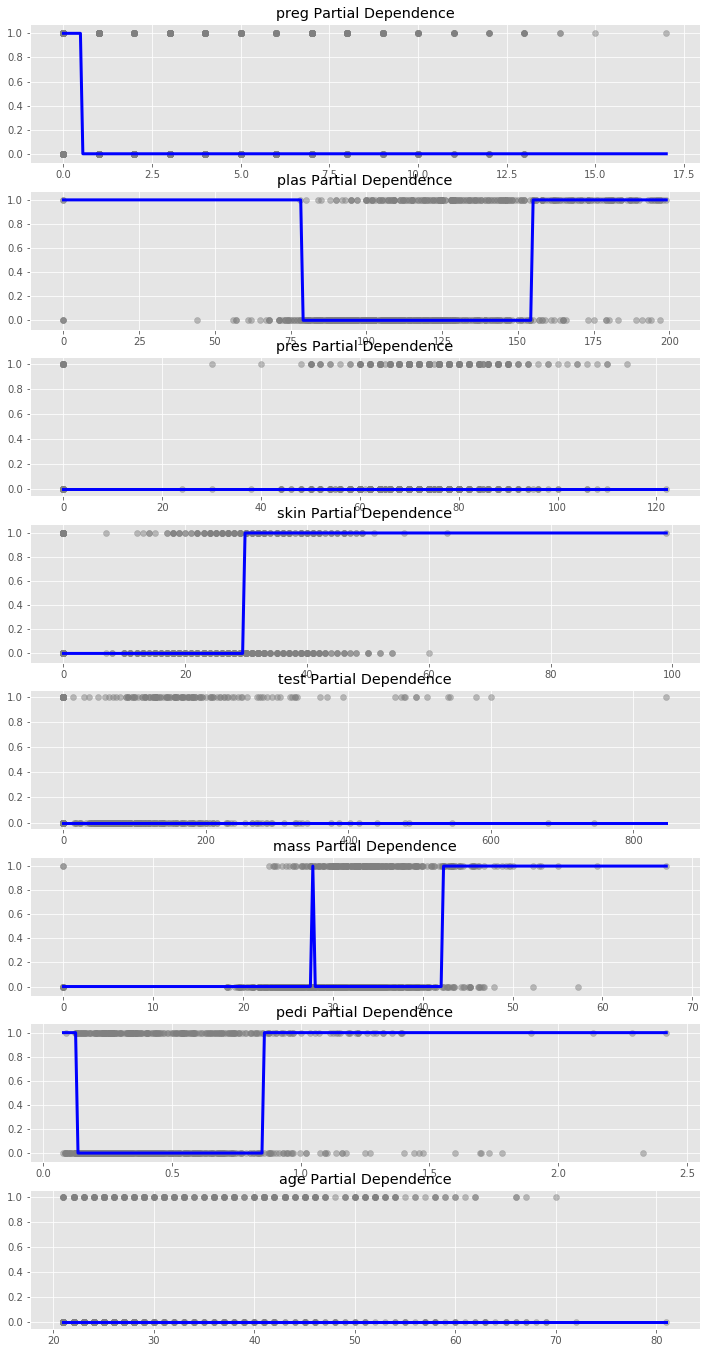

 50%|█████     | 3/6 [00:38<00:38, 12.98s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 8.112349033355713
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.01340484619140625
len(y) != len(y_hat), so no regressions included
DT: MSE = 0.1328125
RF: mean=-0.175906 std=0.035557
CV CALC TIME: 0.7960240840911865


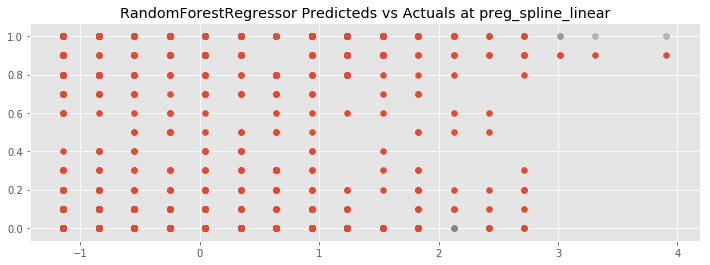

PLOT PREDICTED VS ACTUALS TIME: 0.31318092346191406


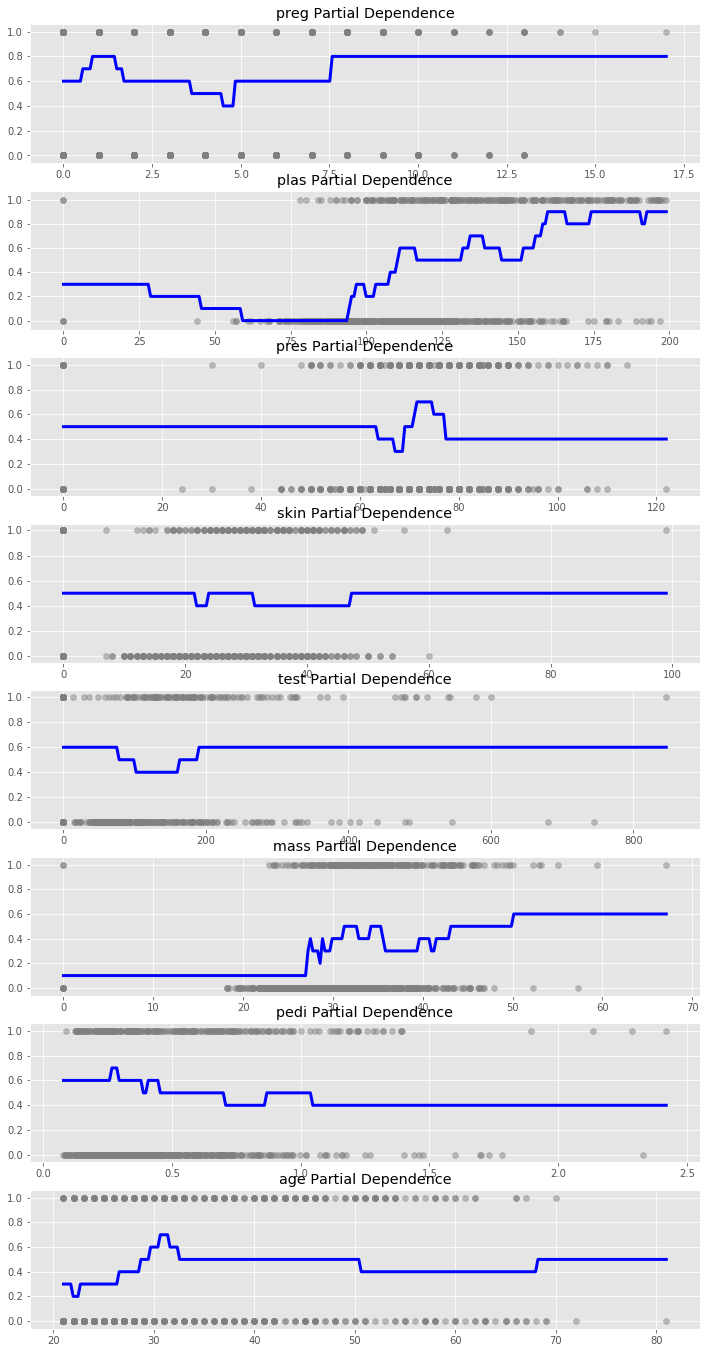

 67%|██████▋   | 4/6 [00:48<00:24, 12.15s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.857234954833984
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.006096839904785156
len(y) != len(y_hat), so no regressions included
RF: MSE = 0.07455729166666648
GB: mean=-0.161878 std=0.025086
CV CALC TIME: 1.401576042175293


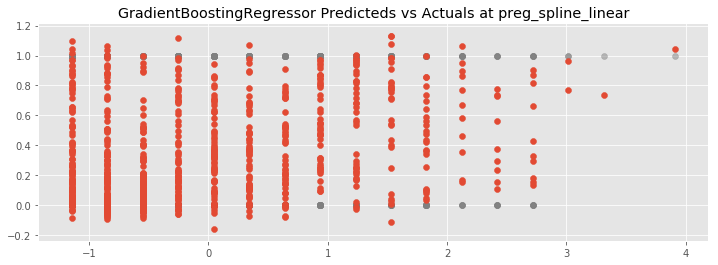

PLOT PREDICTED VS ACTUALS TIME: 0.25072574615478516


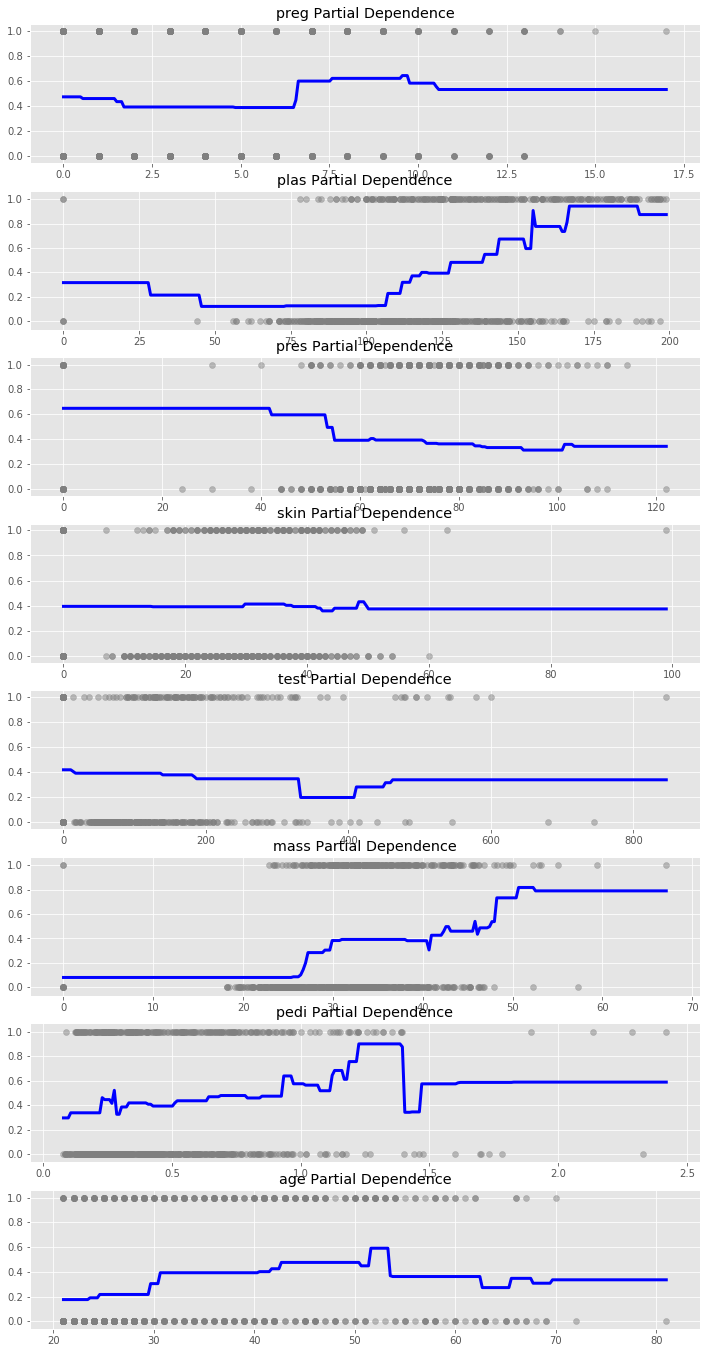

 83%|████████▎ | 5/6 [00:59<00:11, 11.94s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.854263067245483
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.004929065704345703
len(y) != len(y_hat), so no regressions included
GB: MSE = 0.10076990355366204
GB: mean=-0.171367 std=0.013985
CV CALC TIME: 0.864558219909668


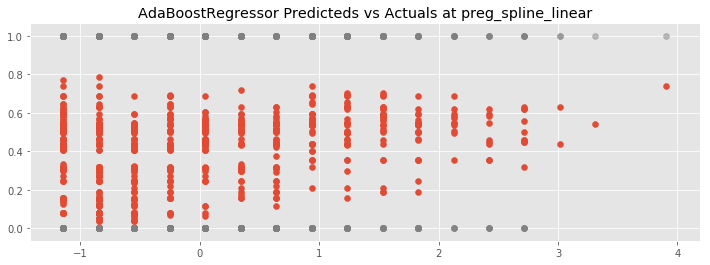

PLOT PREDICTED VS ACTUALS TIME: 0.2553598880767822


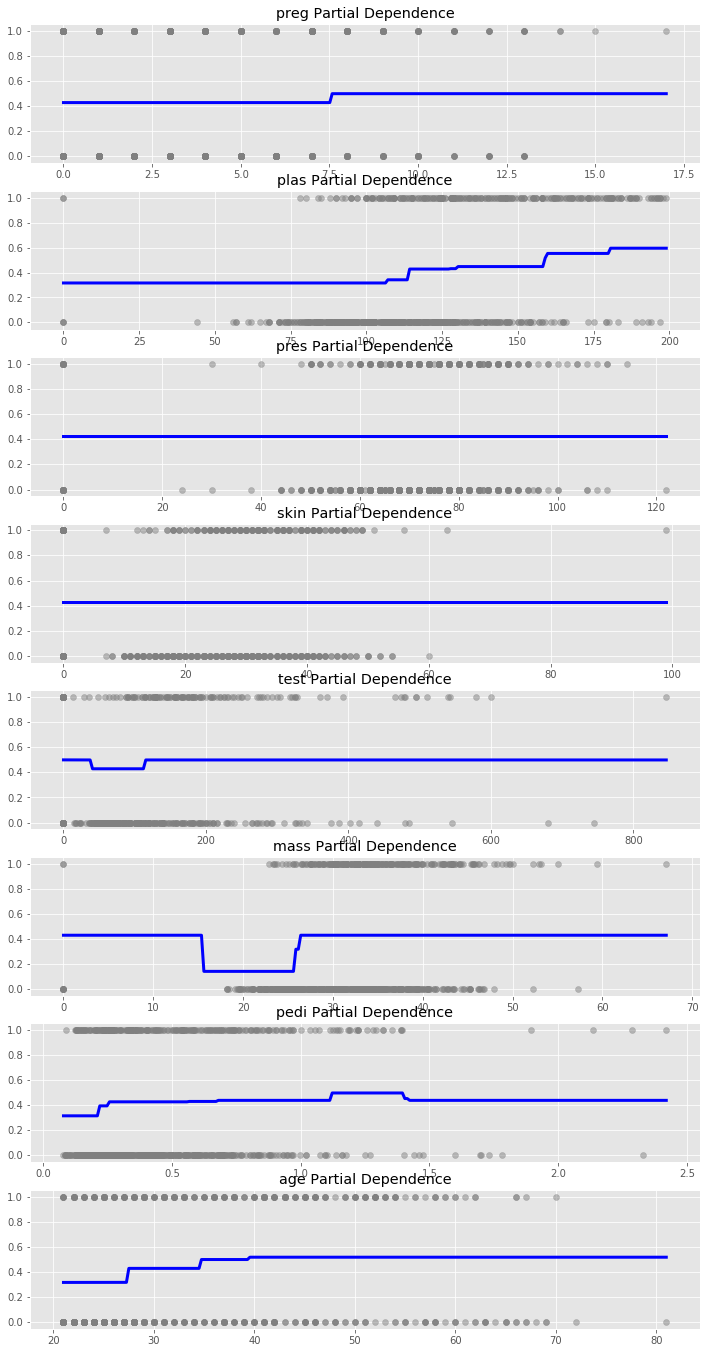

100%|██████████| 6/6 [01:09<00:00, 11.62s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.801333904266357
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.004051923751831055
len(y) != len(y_hat), so no regressions included
GB: MSE = 0.1588905286361065


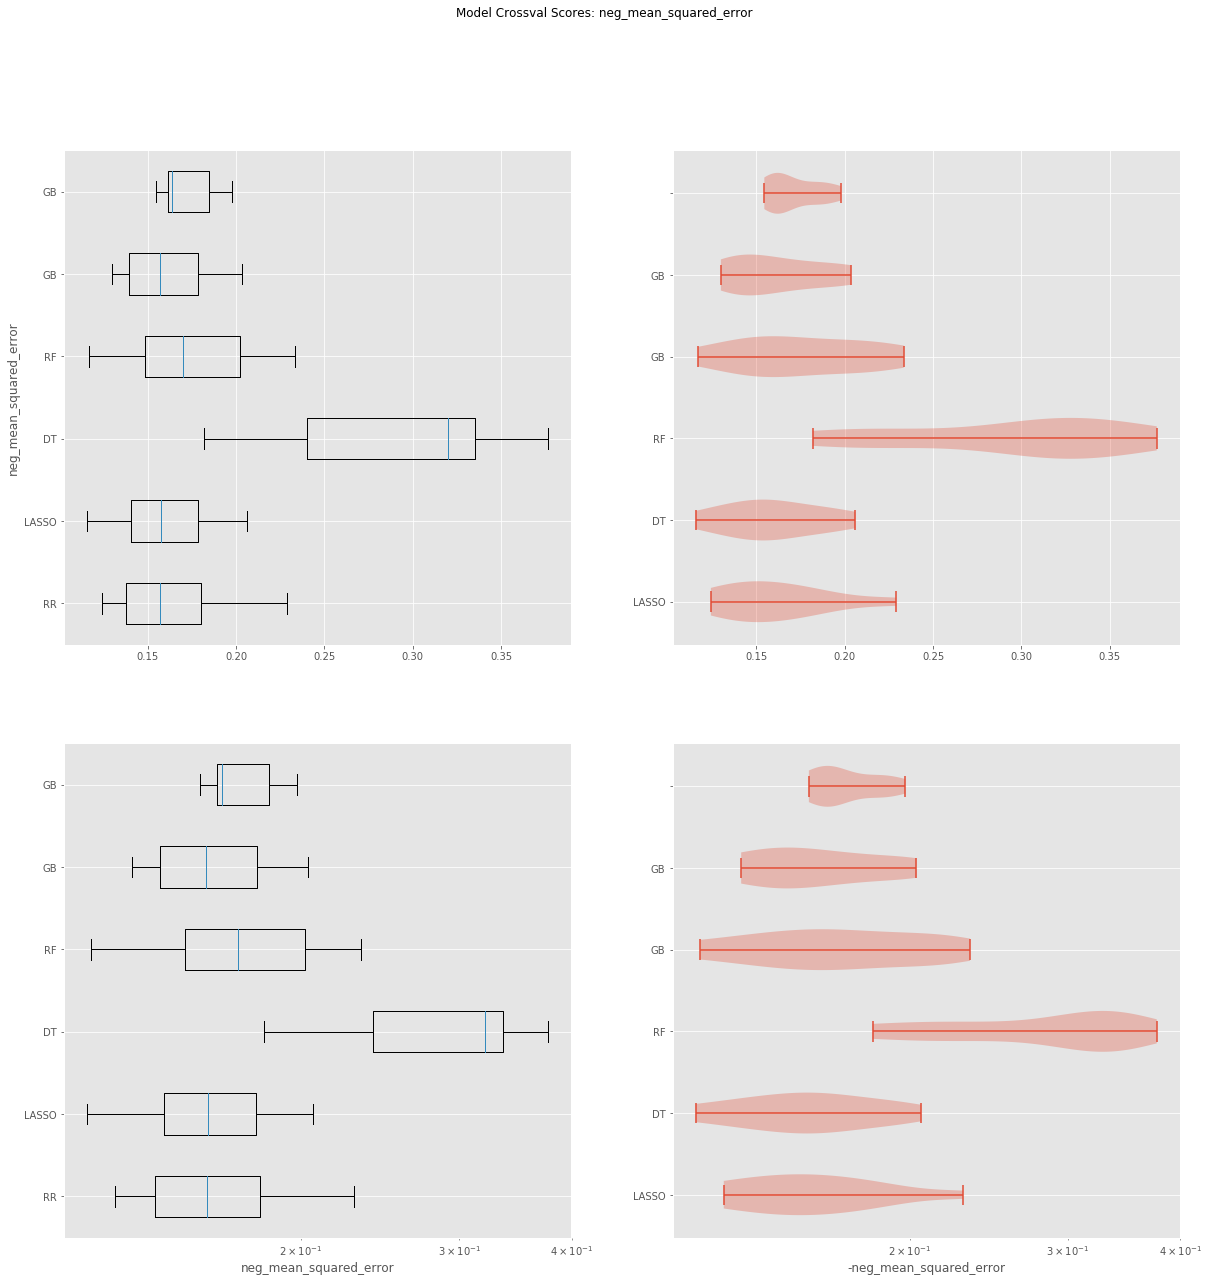

PLOT BAR AND VIOLIN TIME: 1.7699918746948242


In [10]:
names2, results2, models2, pipeline2 = autoregression.compare_predictions(df, 'class', univariates=False)

MAKE SUBSAMPLE TIME: 3.814697265625e-06
CLEAN_DF TIME: 0.010350704193115234


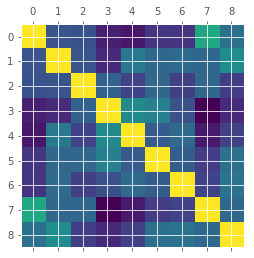

PLOT CORRELATION TIME: 0.15287208557128906


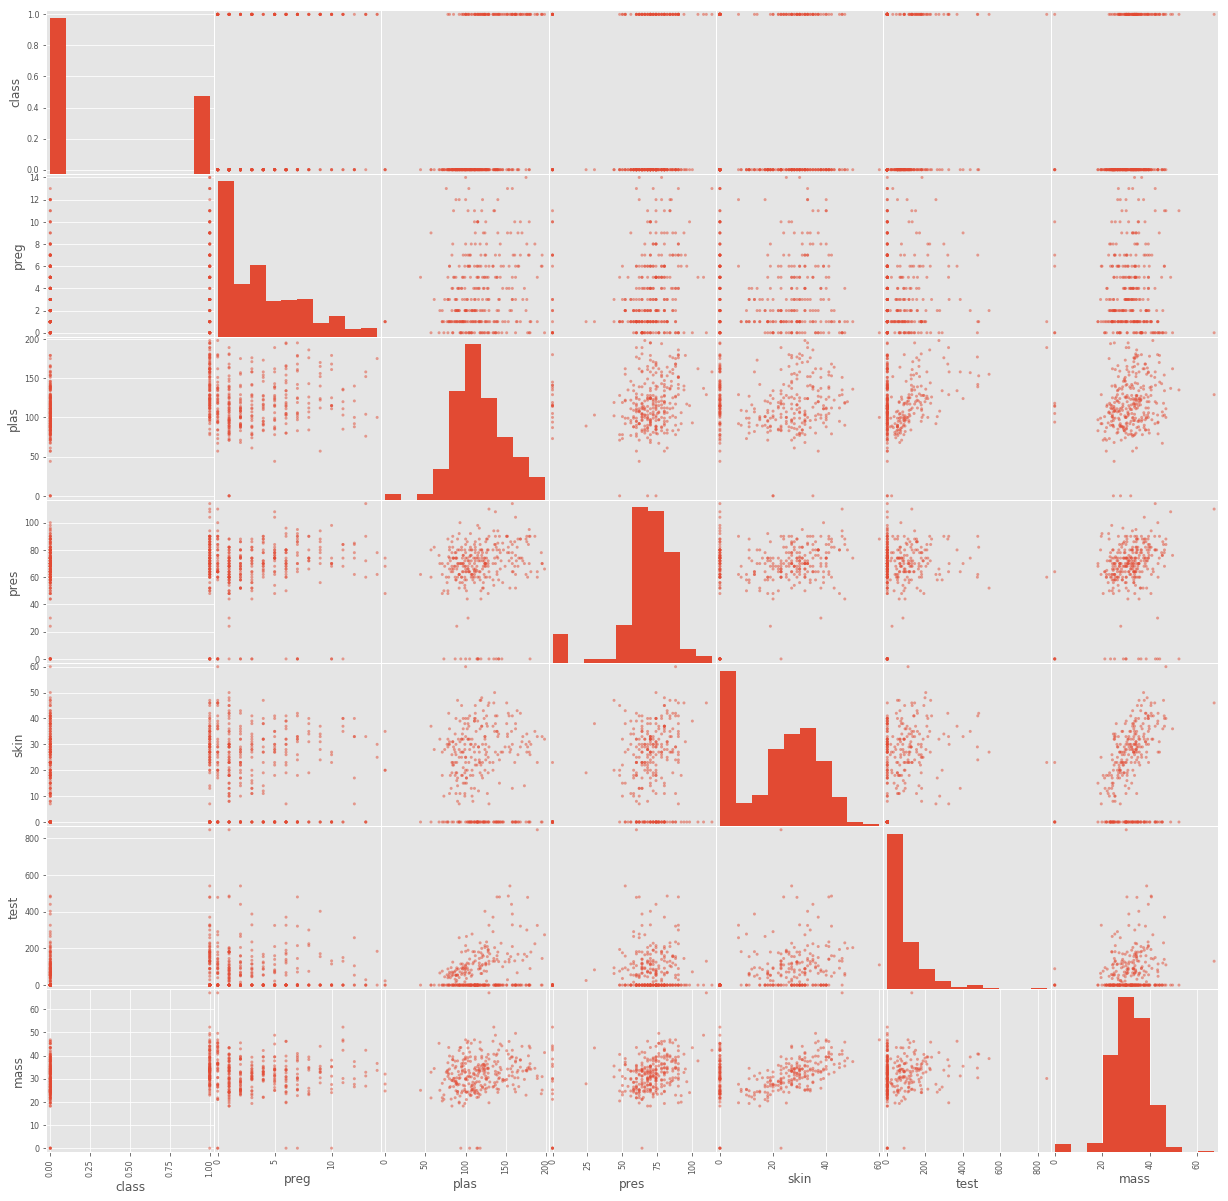

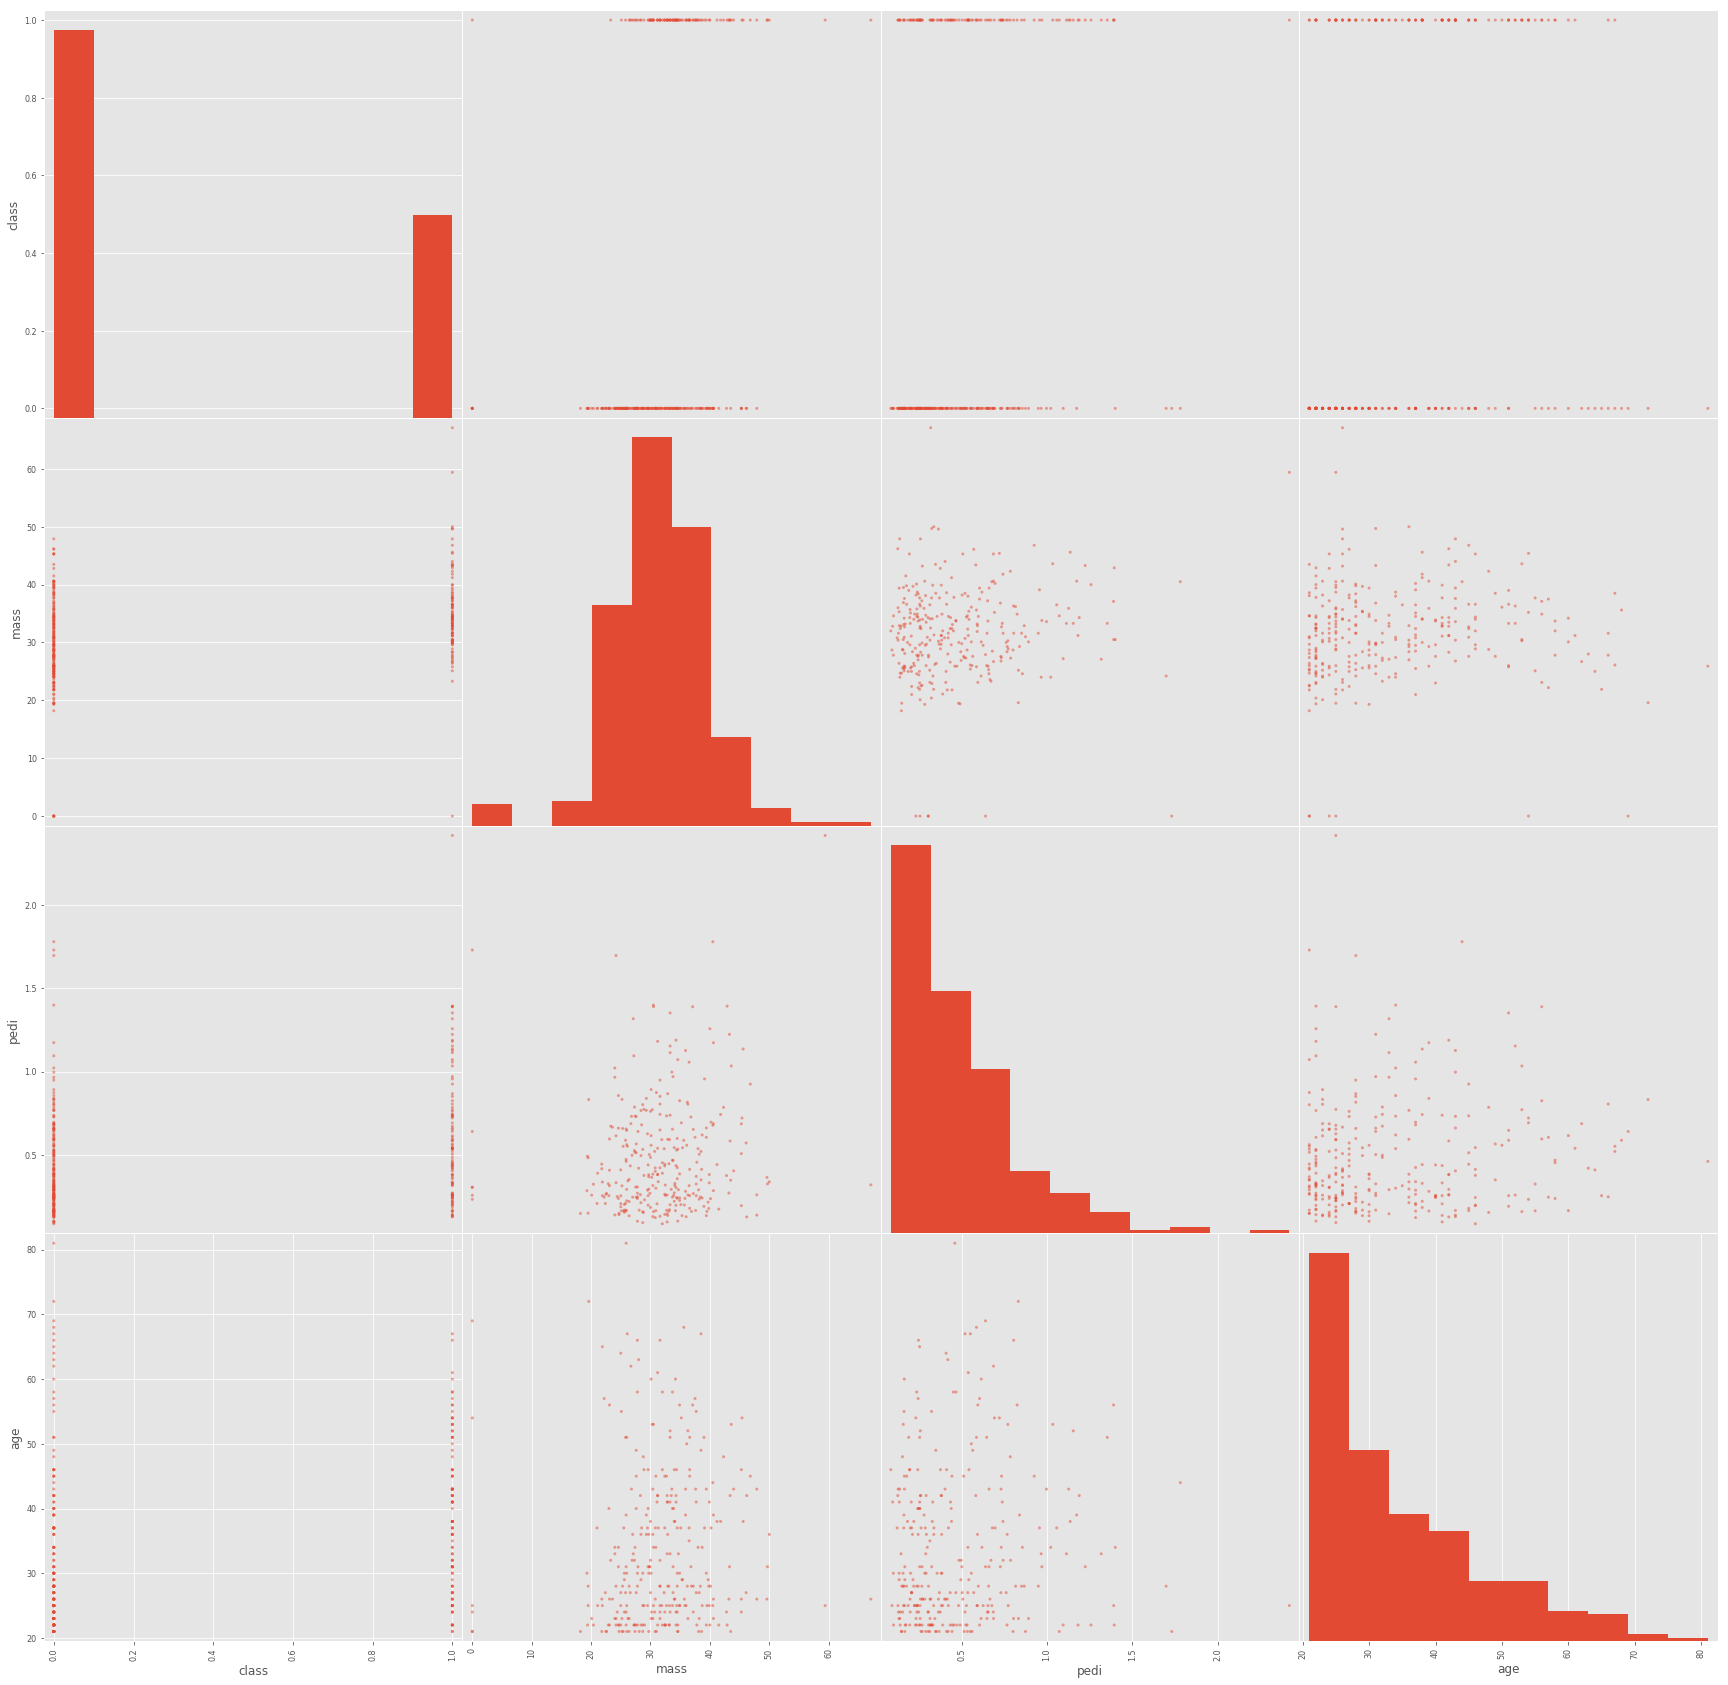

MAKE SCATTER TIME: 6.931474924087524

DF COLUMNS: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']



  0%|          | 0/6 [00:00<?, ?it/s]

DF COLUMNS AFTER TRANSFORM: 
['preg_spline_linear', 'preg_spline_0', 'preg_spline_1', 'preg_spline_2', 'plas_spline_linear', 'plas_spline_0', 'plas_spline_1', 'plas_spline_2', 'pres_spline_linear', 'pres_spline_0', 'pres_spline_1', 'pres_spline_2', 'skin_spline_linear', 'skin_spline_0', 'skin_spline_1', 'skin_spline_2', 'test_spline_linear', 'test_spline_0', 'test_spline_1', 'test_spline_2', 'mass_spline_linear', 'mass_spline_0', 'mass_spline_1', 'mass_spline_2', 'pedi_spline_linear', 'pedi_spline_0', 'pedi_spline_1', 'pedi_spline_2', 'age_spline_linear', 'age_spline_0', 'age_spline_1', 'age_spline_2', 'class']

2
Y VARIABLE: "class" IS CONTINUOUS

RR: mean=-0.161661 std=0.029874
CV CALC TIME: 0.05486321449279785


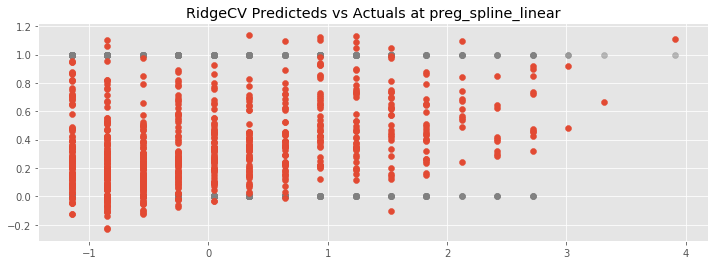

PLOT PREDICTED VS ACTUALS TIME: 0.2796616554260254


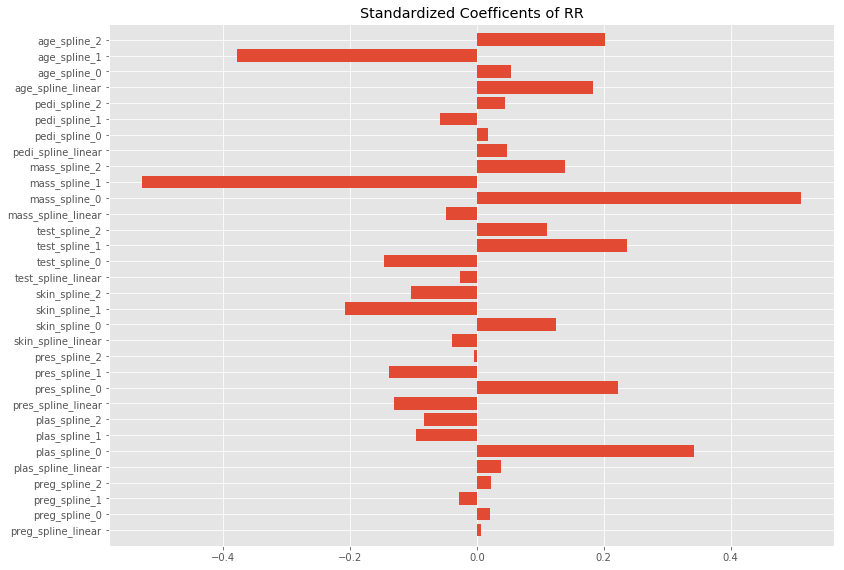

PLOT COEFFICIANTS TIME: 0.5468130111694336


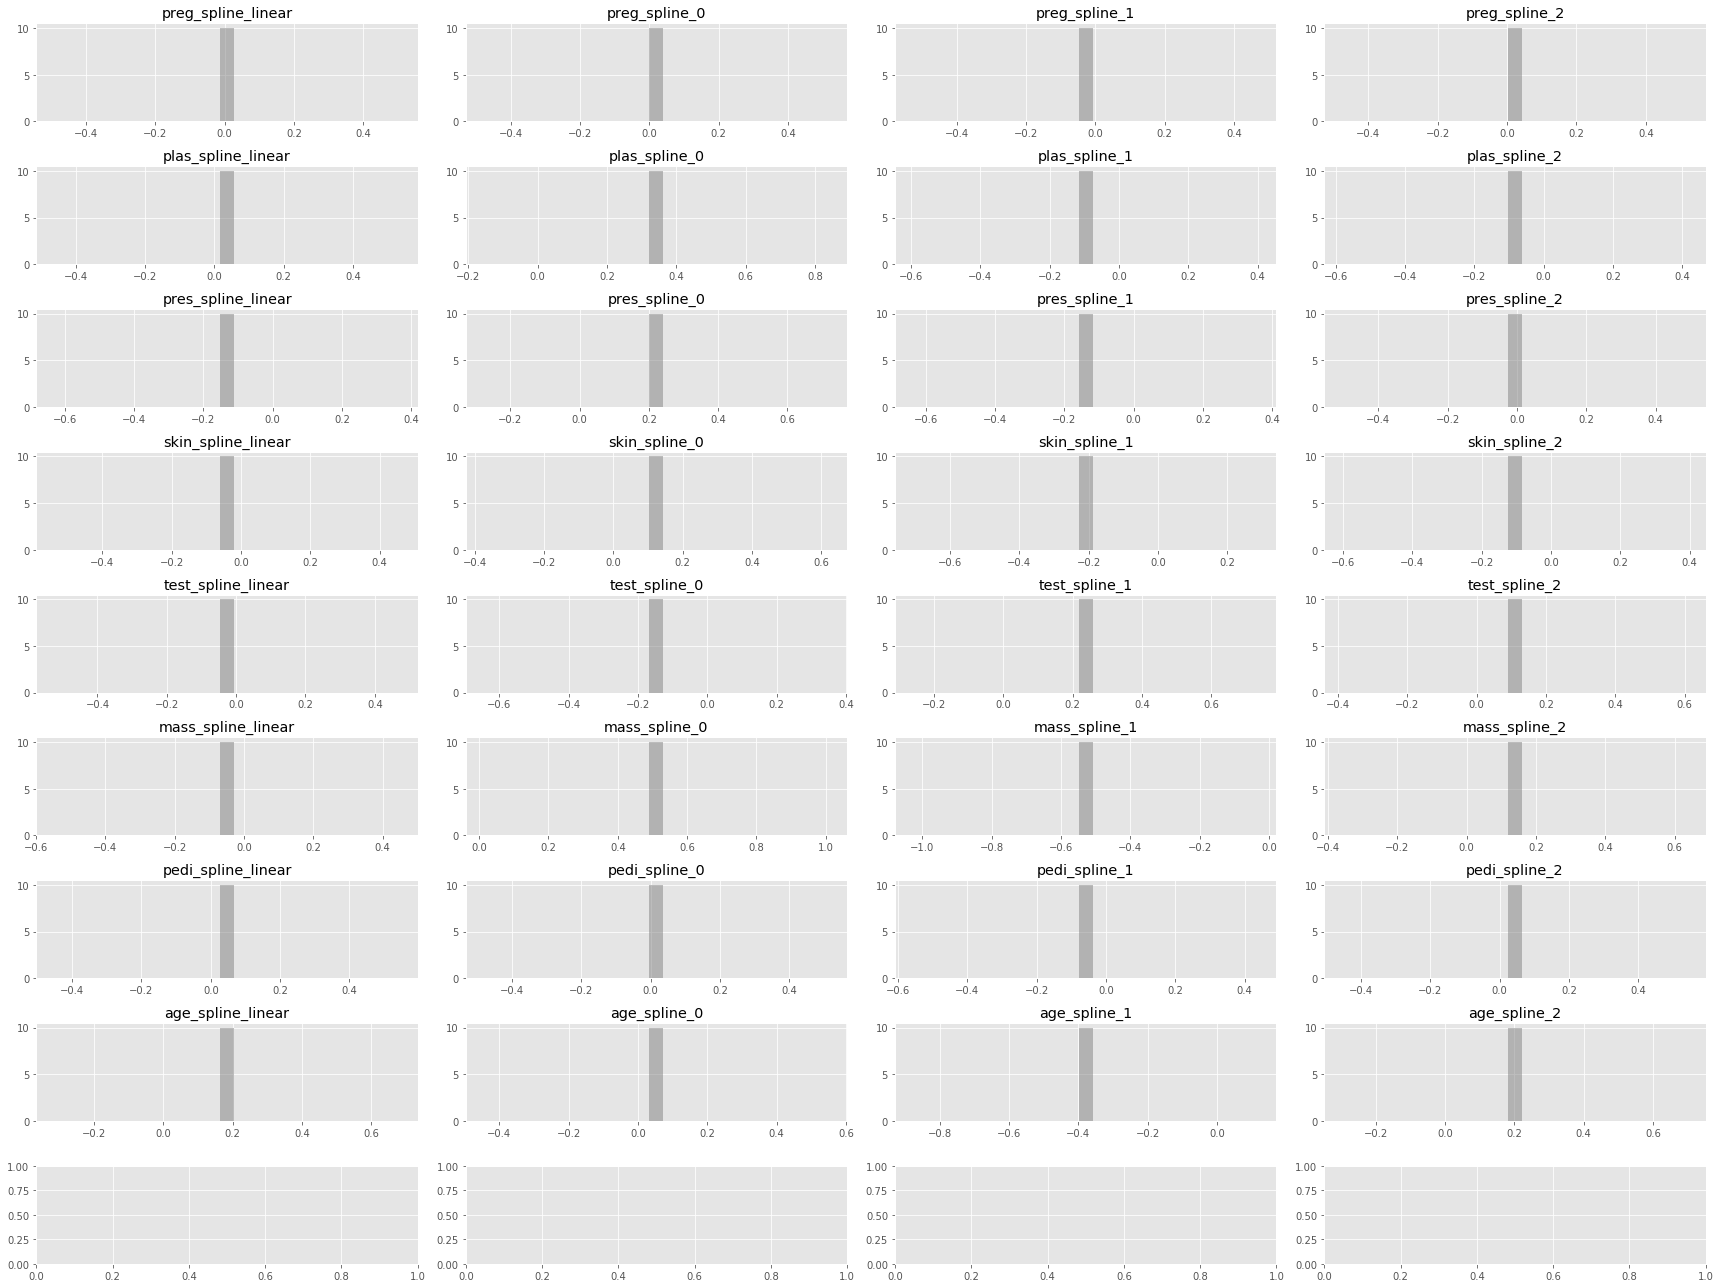

PLOT BOOTSTRAP COEFFICIANTS TIME: 5.2983551025390625


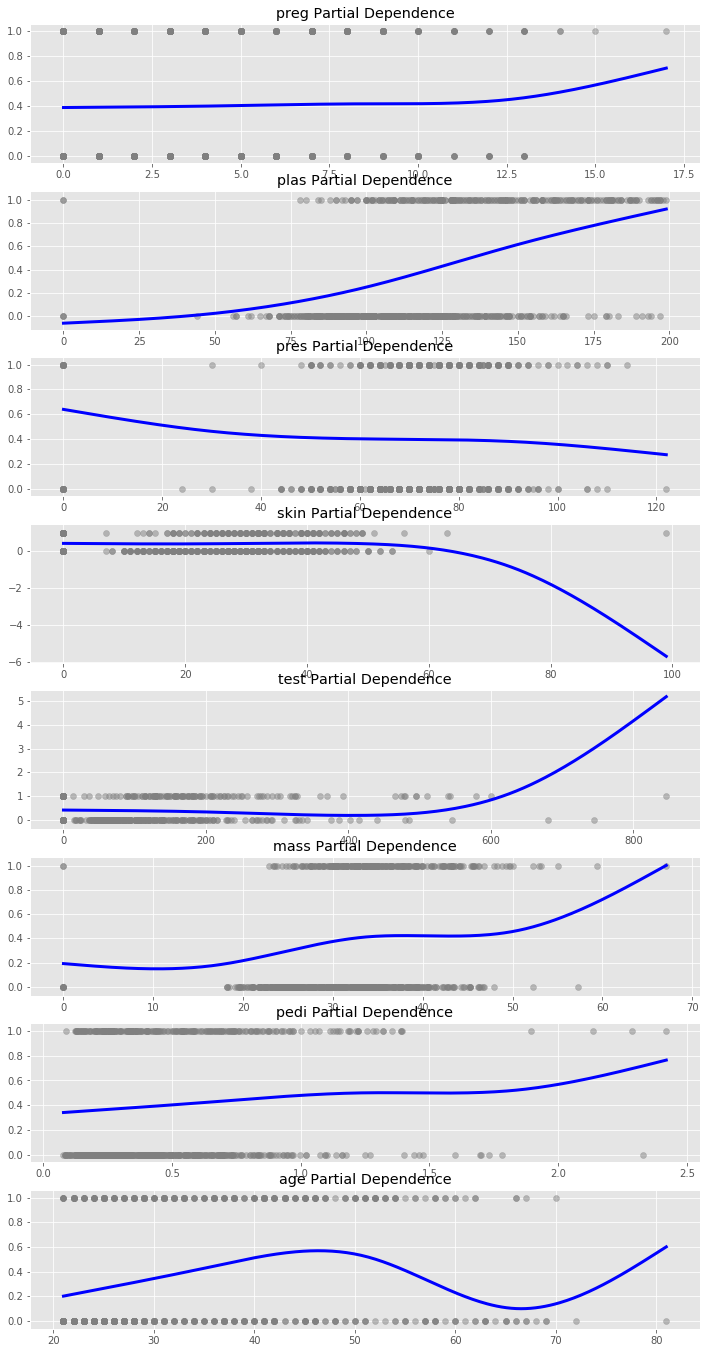

 17%|█▋        | 1/6 [00:15<01:15, 15.05s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 8.759045839309692
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.007277011871337891
len(y) != len(y_hat), so no regressions included
RR: MSE = 0.25272185782784984
LASSO: mean=-0.159162 std=0.026263
CV CALC TIME: 0.18201494216918945


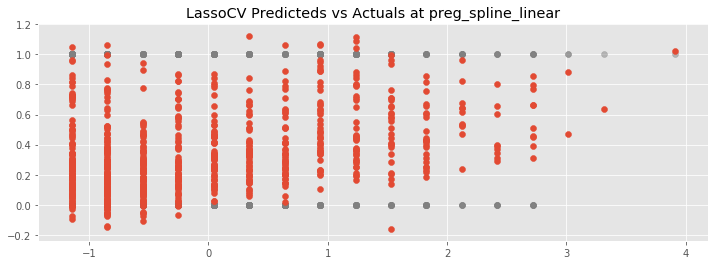

PLOT PREDICTED VS ACTUALS TIME: 0.3506309986114502


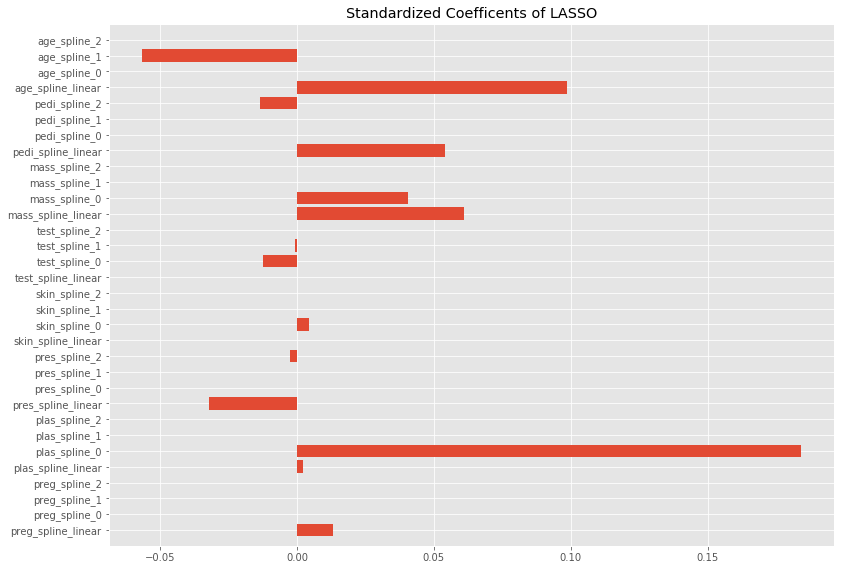

PLOT COEFFICIANTS TIME: 0.8150351047515869


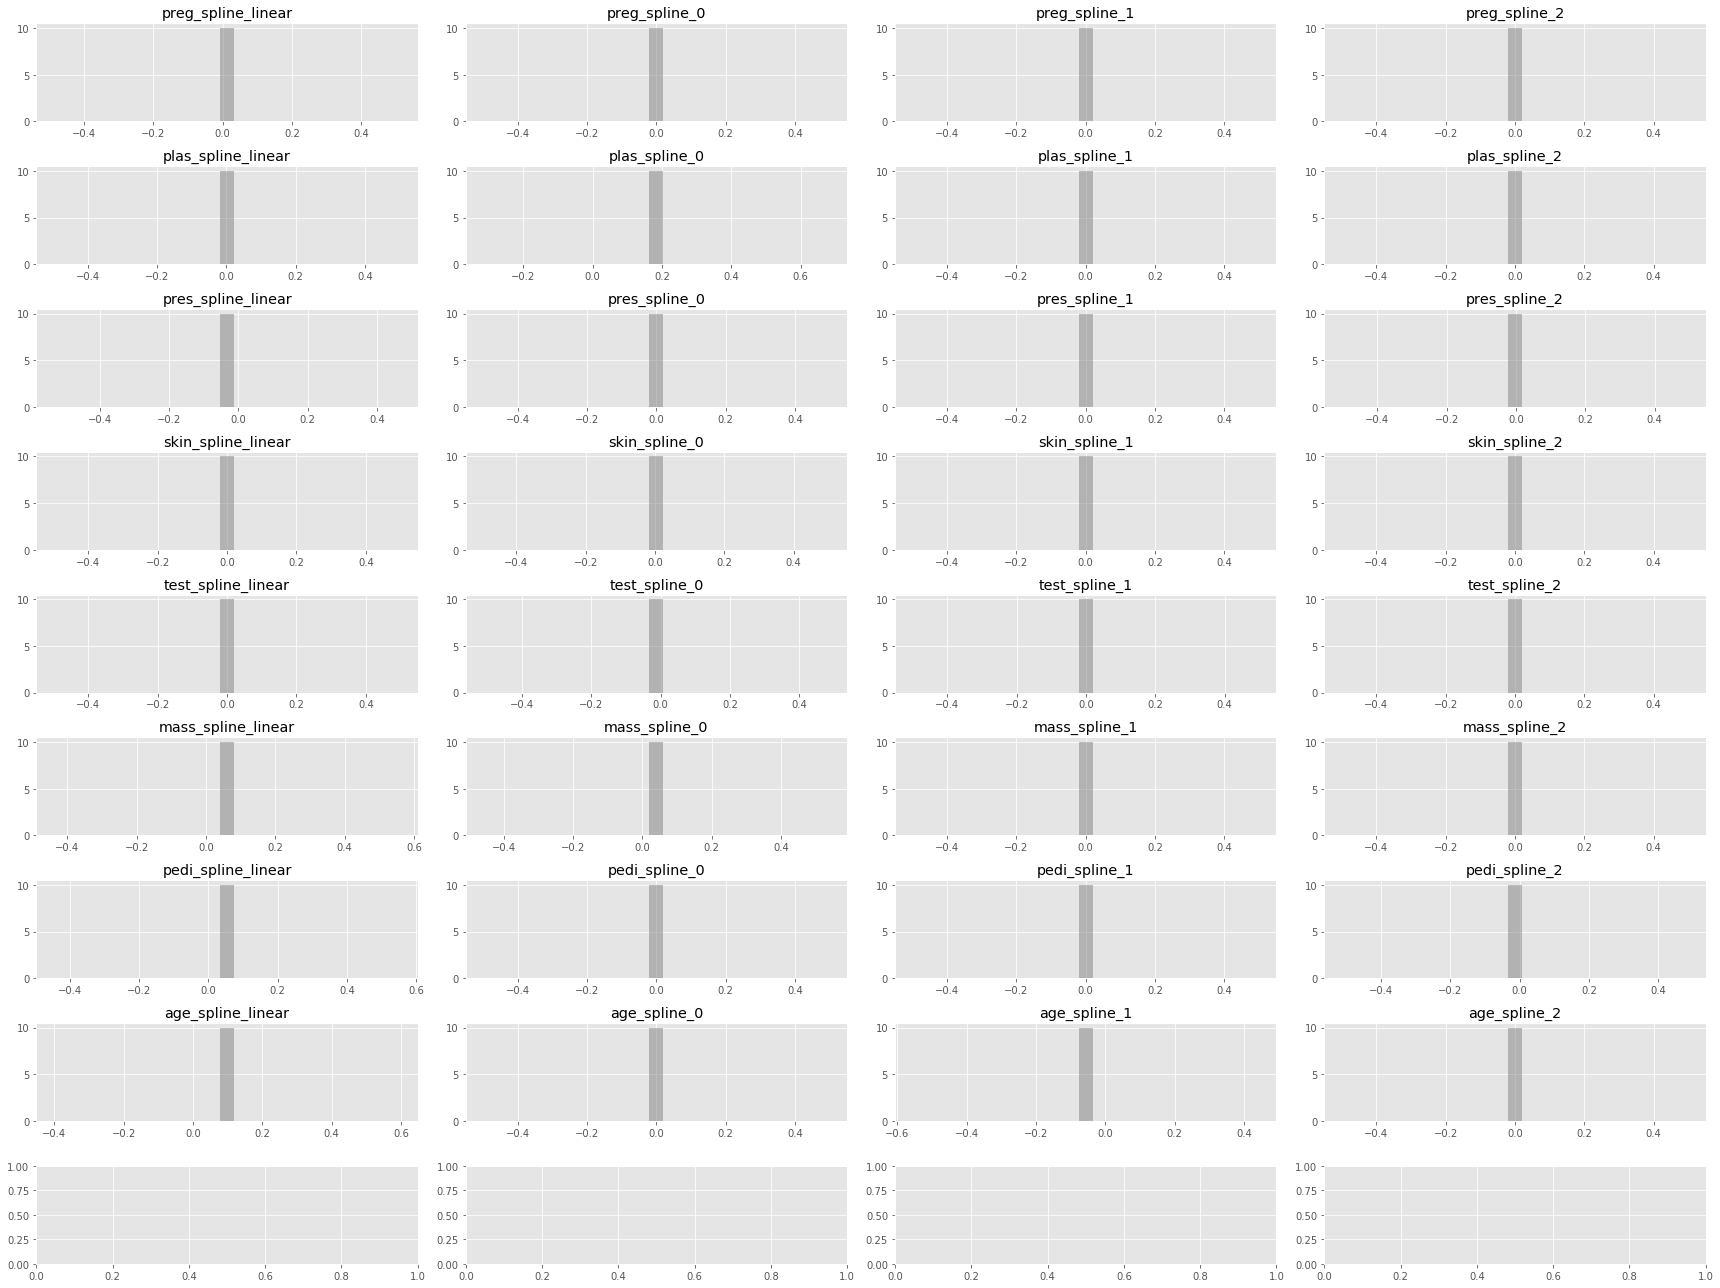

PLOT BOOTSTRAP COEFFICIANTS TIME: 6.565743923187256


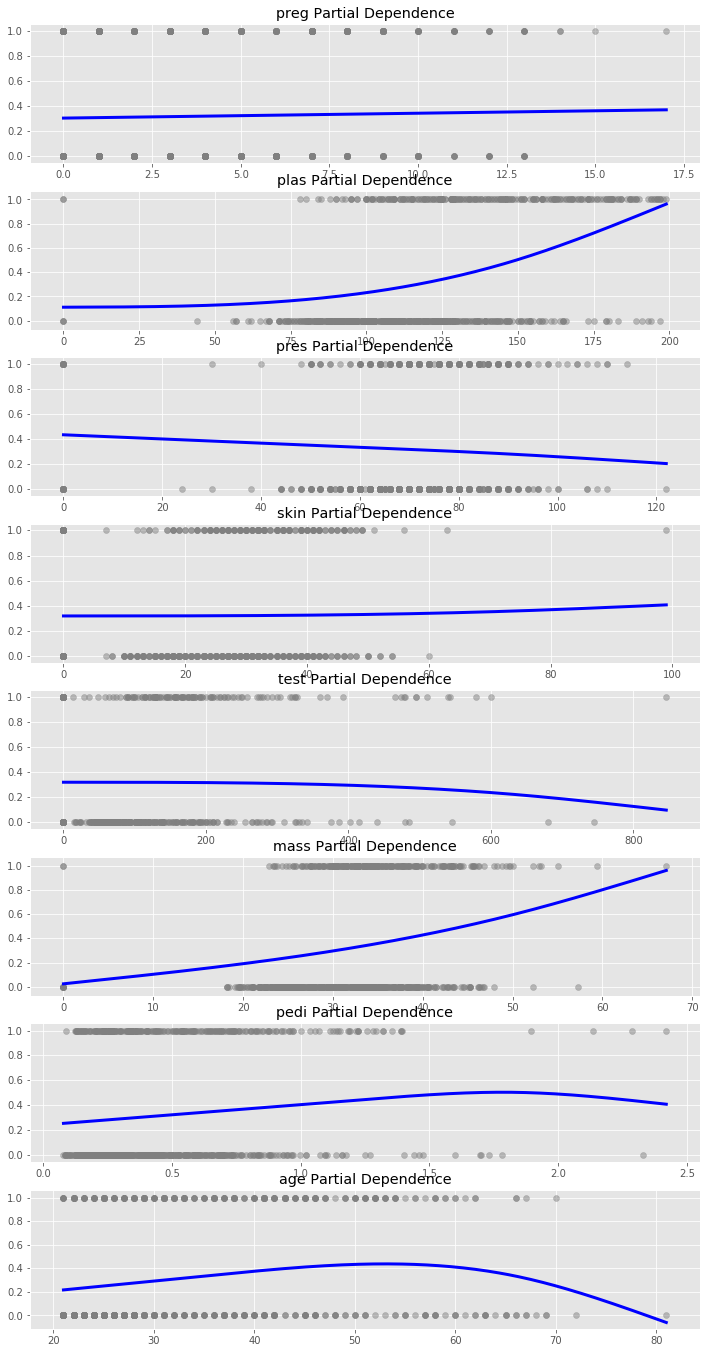

 33%|███▎      | 2/6 [00:31<01:02, 15.56s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.86301589012146
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.009427070617675781
len(y) != len(y_hat), so no regressions included
LASSO: MSE = 0.15317659504370018
DT: mean=-0.306066 std=0.072236
CV CALC TIME: 0.14653396606445312


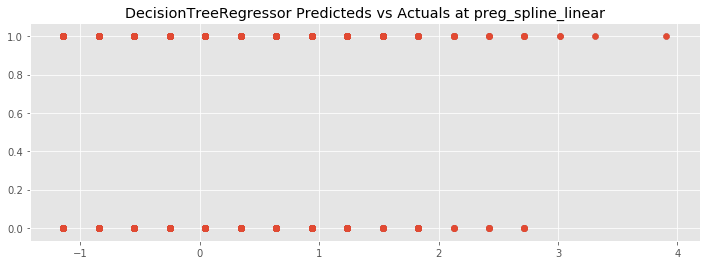

PLOT PREDICTED VS ACTUALS TIME: 0.24052929878234863


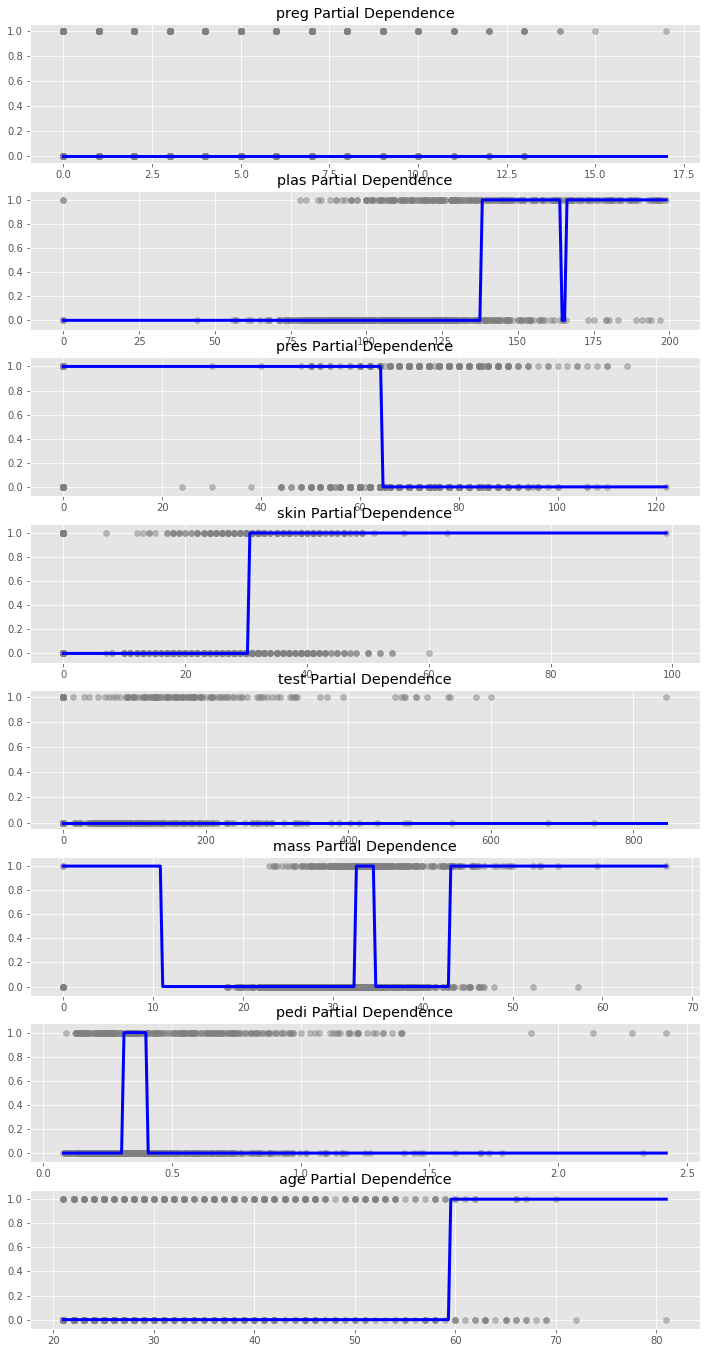

 50%|█████     | 3/6 [00:38<00:38, 12.99s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.329415798187256
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.004819154739379883
len(y) != len(y_hat), so no regressions included
DT: MSE = 0.125
RF: mean=-0.174836 std=0.035583
CV CALC TIME: 0.5349218845367432


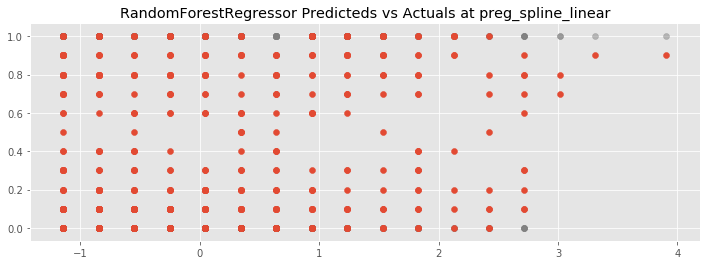

PLOT PREDICTED VS ACTUALS TIME: 0.2864840030670166


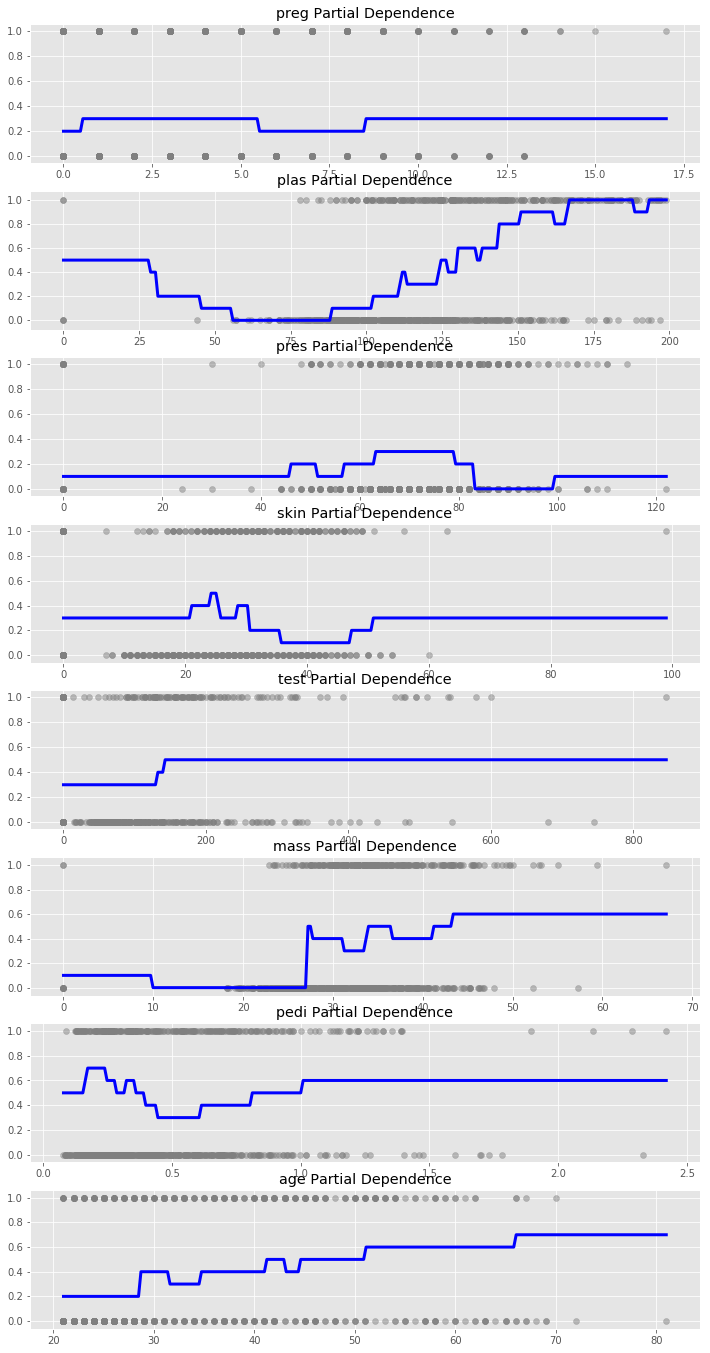

 67%|██████▋   | 4/6 [00:47<00:23, 11.96s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.3368980884552
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.00548100471496582
len(y) != len(y_hat), so no regressions included
RF: MSE = 0.08302083333333311
GB: mean=-0.161691 std=0.025036
CV CALC TIME: 1.3196630477905273


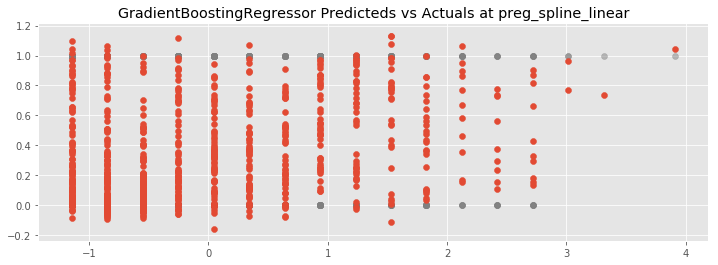

PLOT PREDICTED VS ACTUALS TIME: 0.2586822509765625


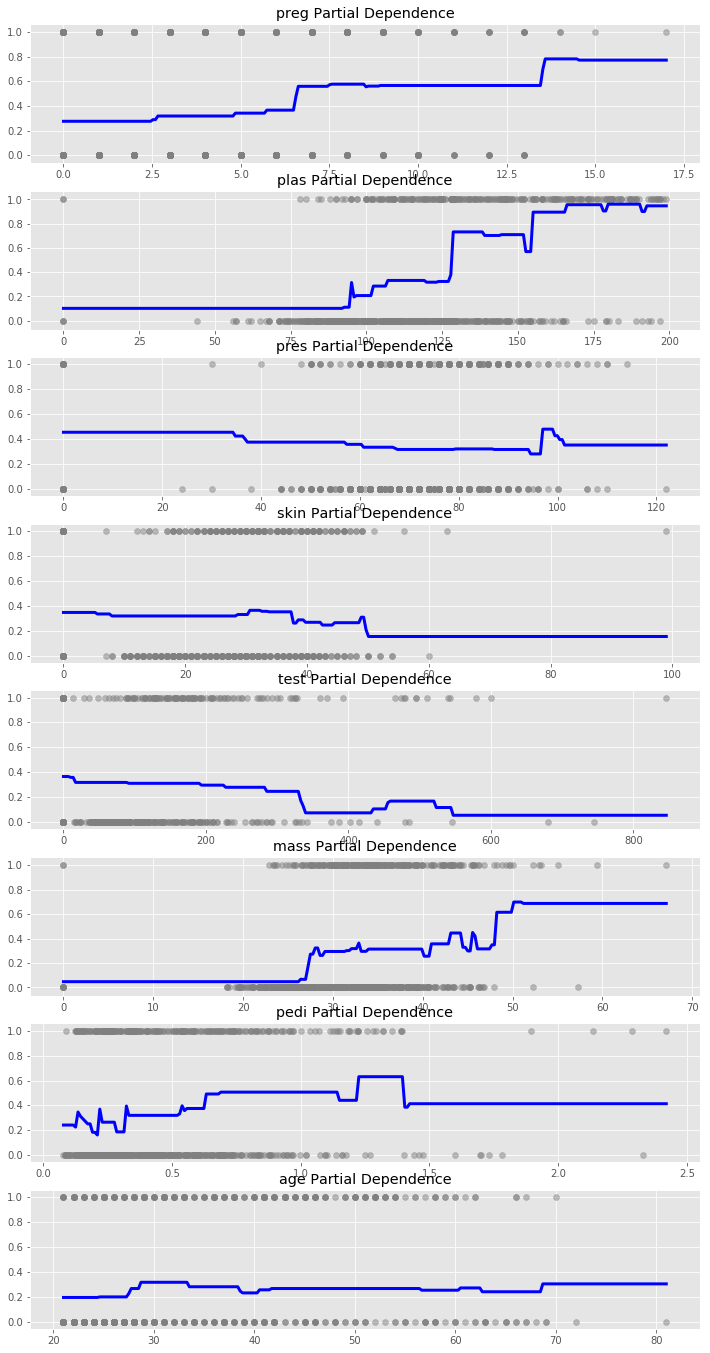

 83%|████████▎ | 5/6 [00:58<00:11, 11.63s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.174522876739502
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.004549980163574219
len(y) != len(y_hat), so no regressions included
GB: MSE = 0.10605472084503466
GB: mean=-0.172814 std=0.023064
CV CALC TIME: 0.7571730613708496


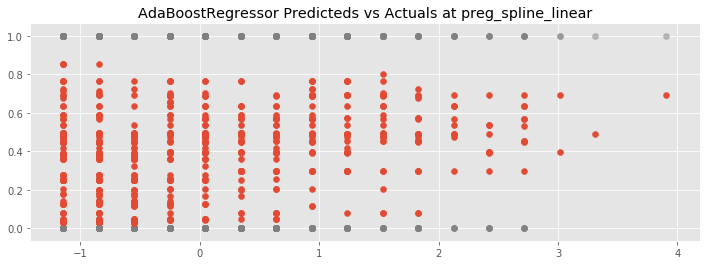

PLOT PREDICTED VS ACTUALS TIME: 0.23890995979309082


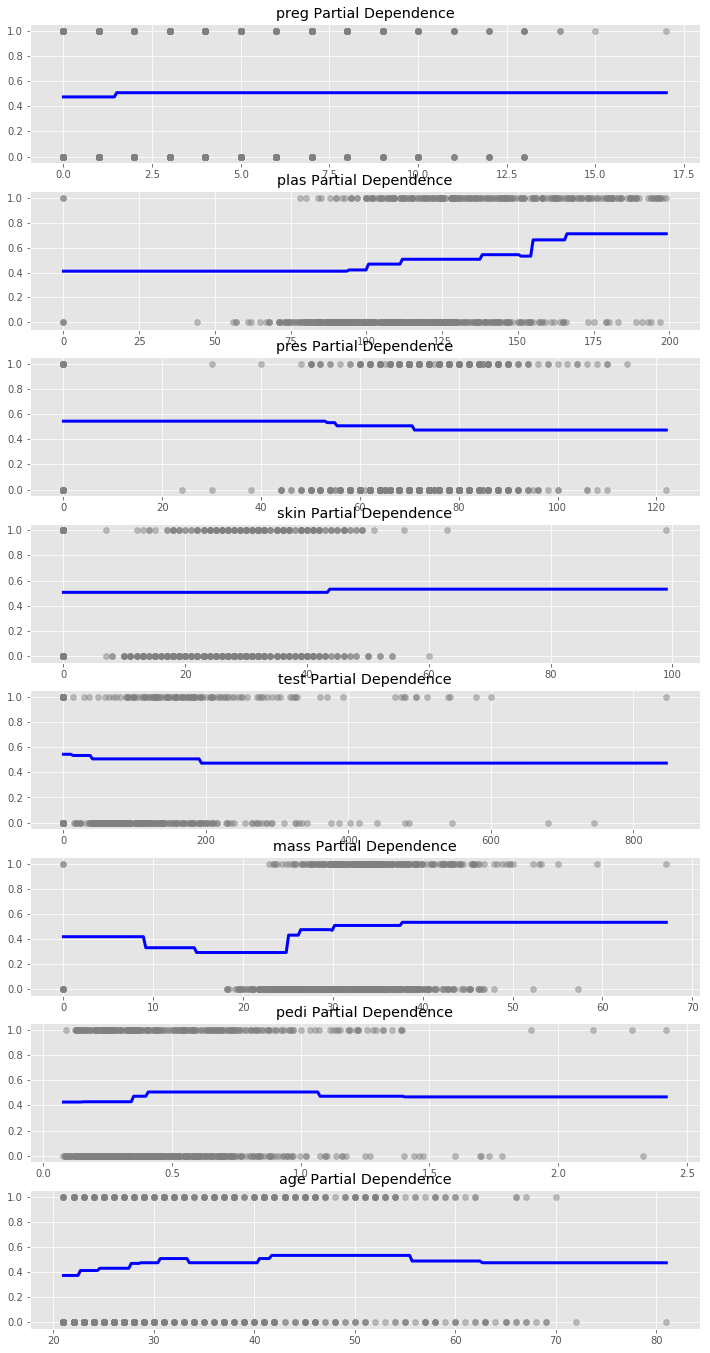

100%|██████████| 6/6 [01:07<00:00, 11.27s/it]

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 7.5023369789123535
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.0060269832611083984
len(y) != len(y_hat), so no regressions included
GB: MSE = 0.16186072272385232


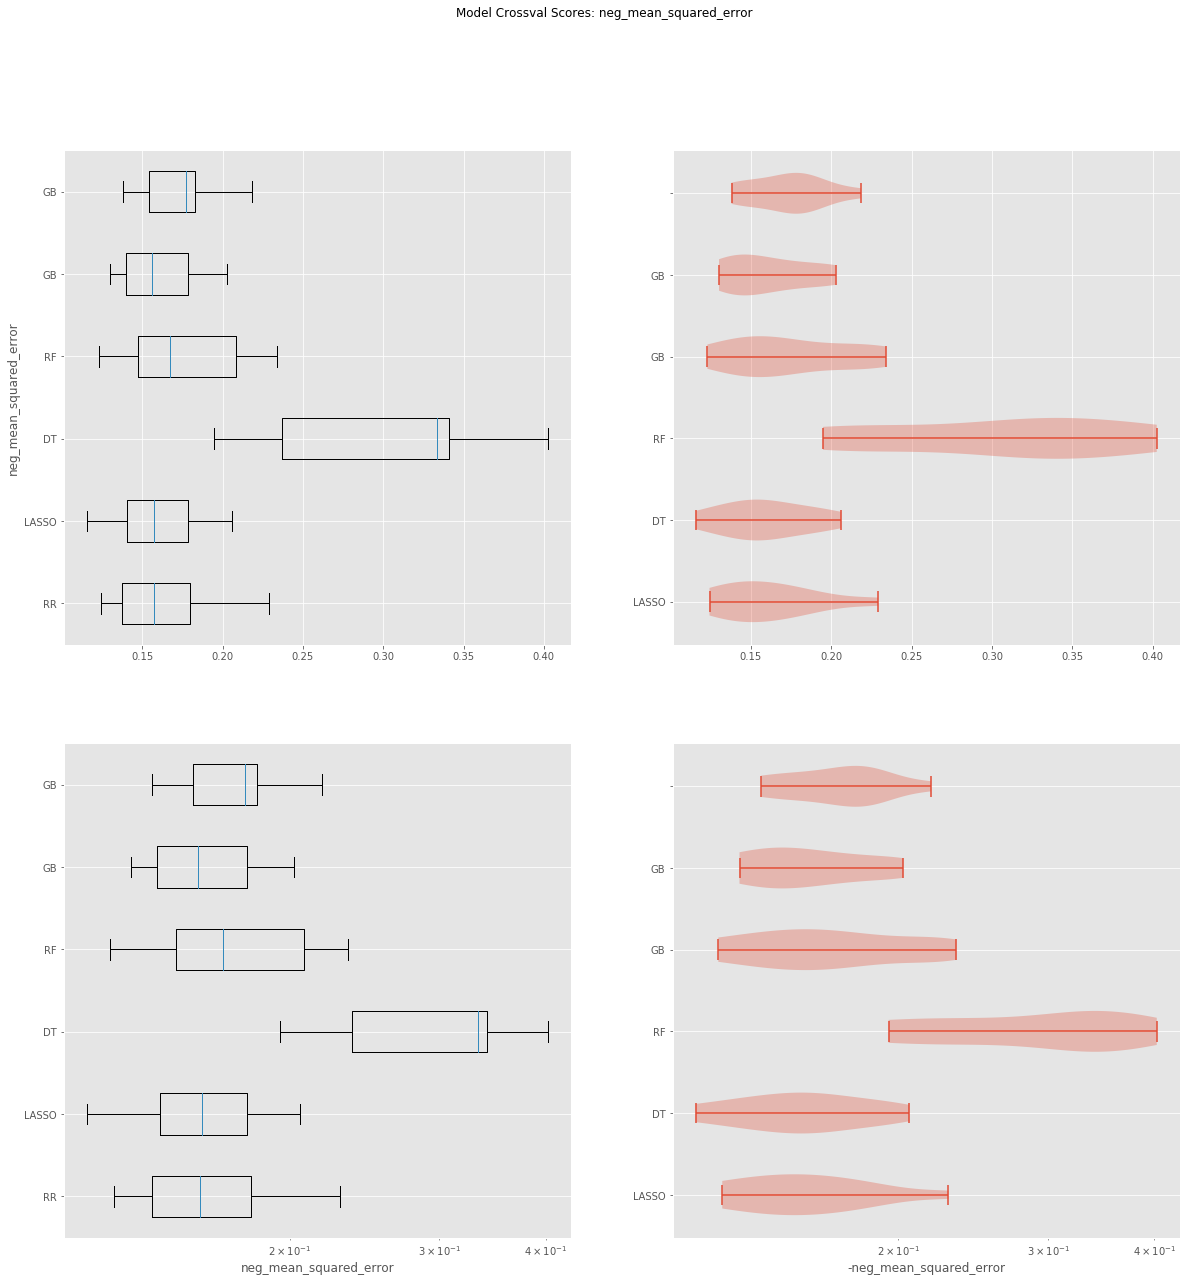

PLOT BAR AND VIOLIN TIME: 1.5669960975646973


In [11]:
names2, results2, models2, pipeline2 = autoregression.compare_predictions(df, 'class', univariates=False)

In [ ]:
plt.matshow(df.corr())

In [ ]:
(continuous_features, category_features) = autoregression.sort_features(df)
if len(continuous_features)>15:
    df_graphable = df[continuous_features[:15]].sample(n=1000)
    print('More continuous features than are graphable in scatter_matrix')
pd.scatter_matrix(df_graphable, figsize=(len(df_graphable)*.11,len(df_graphable)*.1))
plt.show()

In [ ]:
# def plot_roc(model, df_X, y, pipeline=None):
#     # calculate the fpr and tpr for all thresholds of the classification
#     if pipeline:
#         probs = model.predict_proba(pipeline.transform(df_X))
#     else:
#         probs = model.predict_proba(df_X)
#     preds = probs[:,1]
#     fpr, tpr, threshold = roc_curve(y, preds)
#     roc_auc = auc(fpr, tpr)
    
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

# make_roc(df_X=df.drop('class', axis=1), y=df['class'], model=models2[0][1], pipeline=pipeline2)

# def plot_rocs(models, df_X, y, pipeline=None):
#     fig, ax = plt.subplots(1,1)
#     for model in models:
#          galgraphs.plot_roc(ax, model, df_X, y, pipeline)
galgraphs.plot_rocs(models2, df_X=df.drop('class', axis=1), y=df['class'], pipeline=pipeline2)

# Random Uniform Line with Jitter

MAKE SUBSAMPLE TIME: 4.0531158447265625e-06
CLEAN_DF TIME: 0.008414983749389648


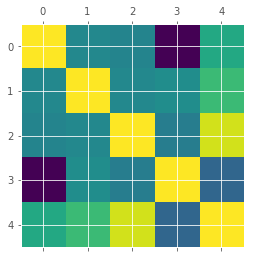

PLOT CORRELATION TIME: 0.13224315643310547


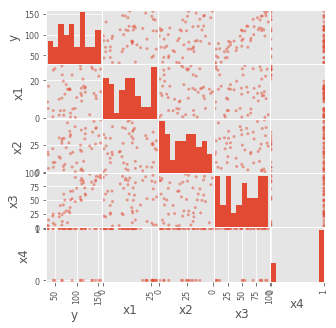

MAKE SCATTER TIME: 1.3556439876556396

DF COLUMNS: 
['x1', 'x2', 'x3', 'x4', 'y']

DF COLUMNS AFTER TRANSFORM: 
['x1_spline_linear', 'x1_spline_0', 'x1_spline_1', 'x1_spline_2', 'x2_spline_linear', 'x2_spline_0', 'x2_spline_1', 'x2_spline_2', 'x3_spline_linear', 'x3_spline_0', 'x3_spline_1', 'x3_spline_2', 'x4_spline_linear', 'x4_spline_0', 'x4_spline_1', 'x4_spline_2', 'y']

50
Y VARIABLE: "y" IS CONTINUOUS

['x1_spline_linear', 'x1_spline_0', 'x1_spline_1', 'x1_spline_2', 'x2_spline_linear', 'x2_spline_0', 'x2_spline_1', 'x2_spline_2', 'x3_spline_linear', 'x3_spline_0', 'x3_spline_1', 'x3_spline_2', 'x4_spline_linear', 'x4_spline_0', 'x4_spline_1', 'x4_spline_2', 'y']


0it [00:00, ?it/s]/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
13it [00:08,  1.54it/s]


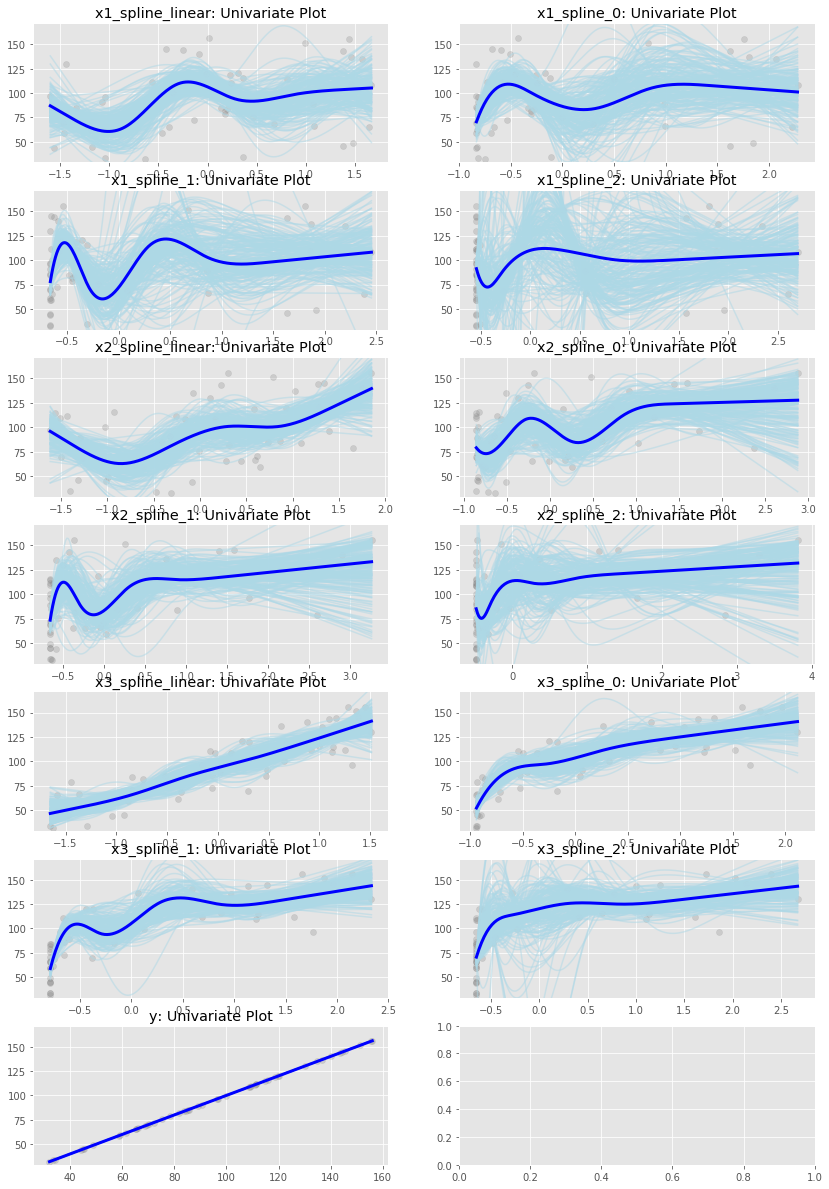

  0%|          | 0/6 [00:00<?, ?it/s]

RR: mean=-14.818470 std=6.772576
CV CALC TIME: 0.034728288650512695


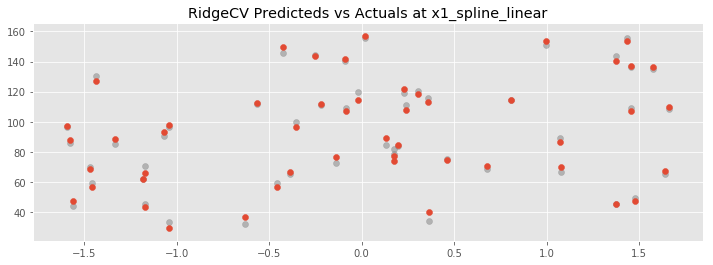

PLOT PREDICTED VS ACTUALS TIME: 0.2377490997314453


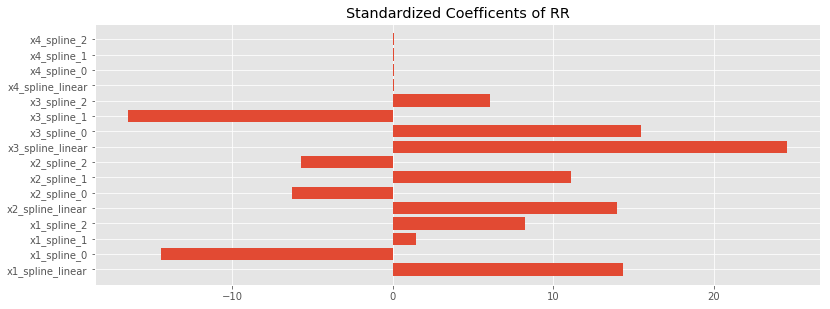

PLOT COEFFICIANTS TIME: 0.2857940196990967


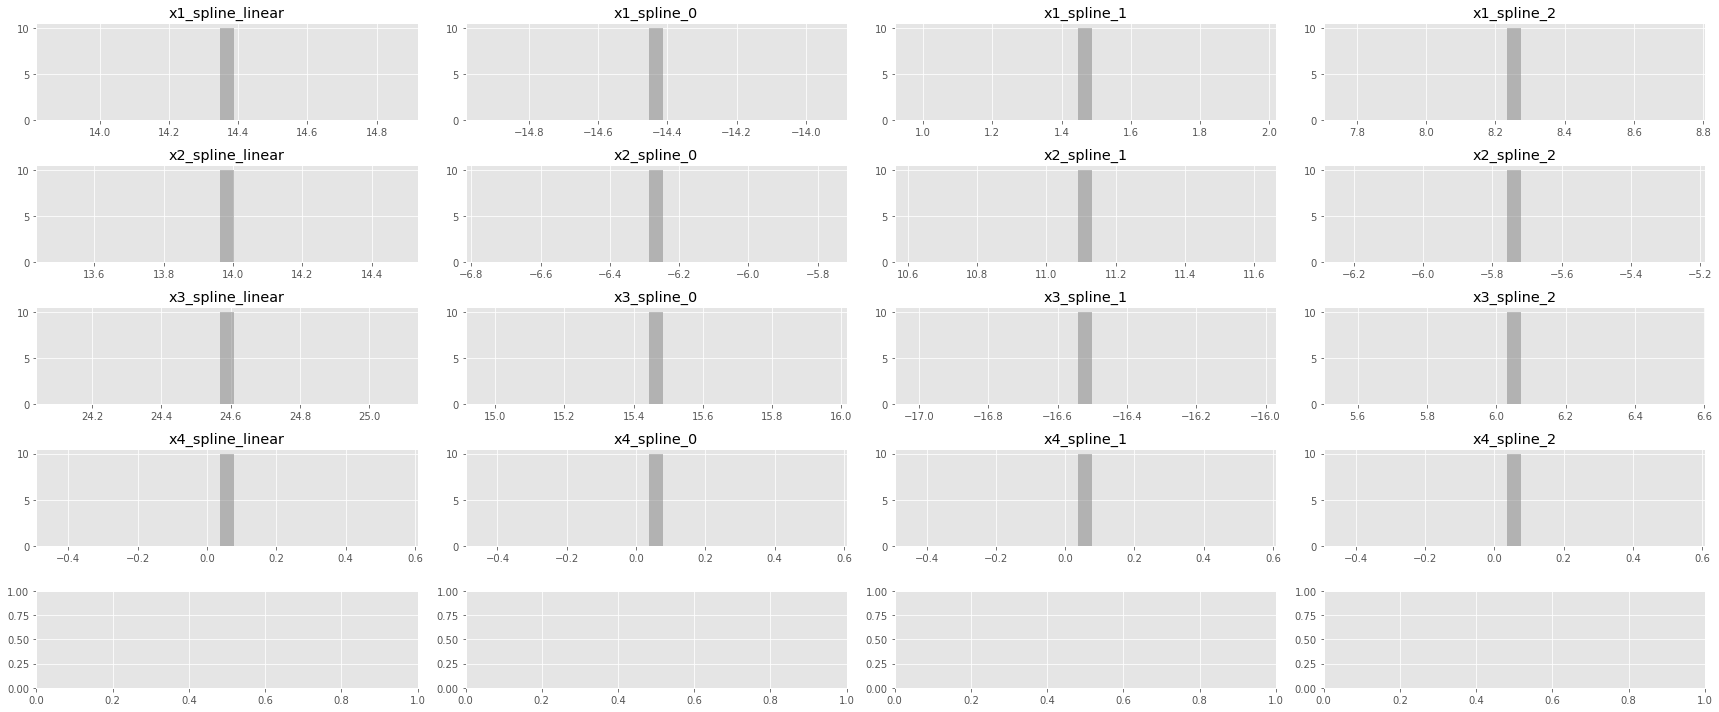

PLOT BOOTSTRAP COEFFICIANTS TIME: 3.576176881790161


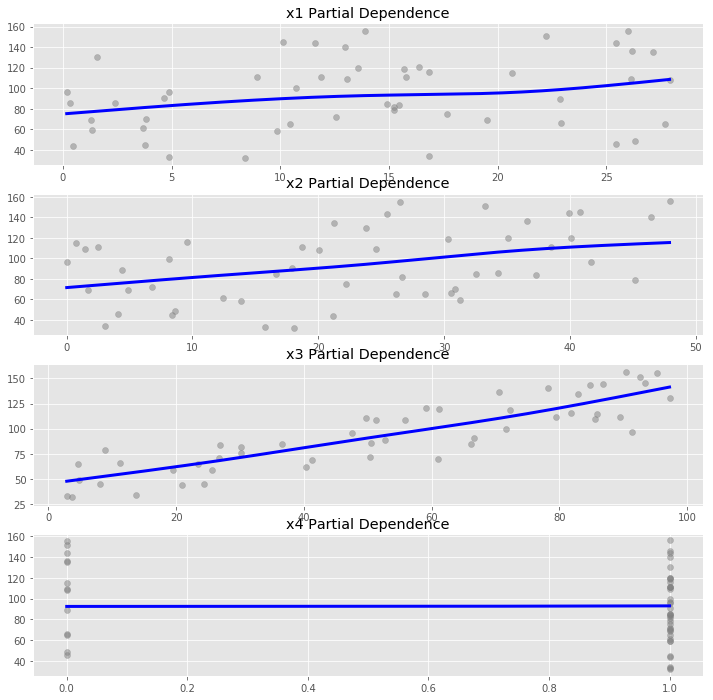

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 2.506107807159424
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.02177286148071289


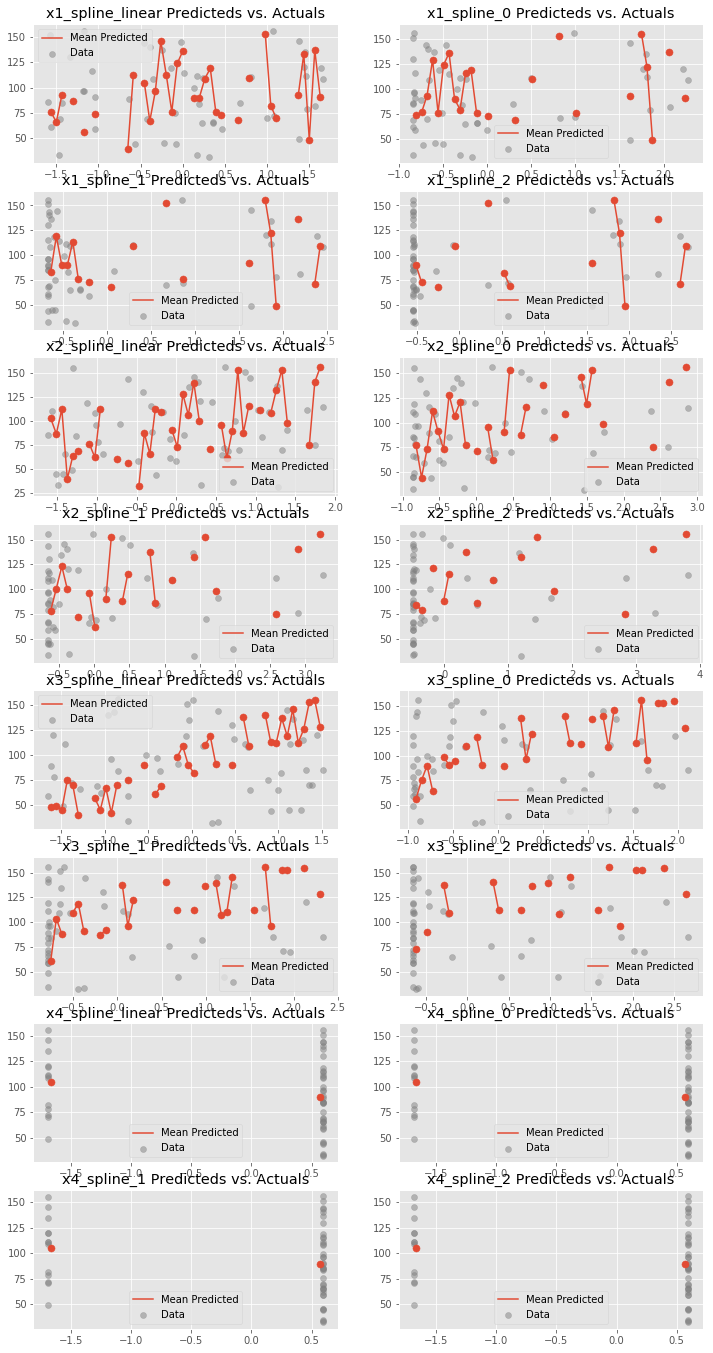

PLOT PREDICTEDS_VS_ACTUALS TIME: 3.8123278617858887


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/autoregression/autoregression.py:358: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  galgraphs.plot_residual_error(ax, df_X_sample.values[:,0].reshape(-1), y.reshape(-1), y_hat_sample.reshape(-1), s=30);


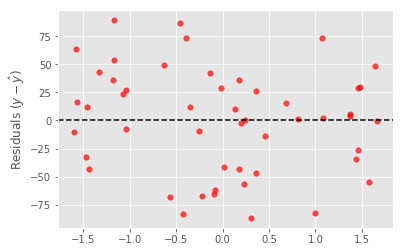

 17%|█▋        | 1/6 [00:10<00:53, 10.79s/it]

PLOT RESIDUAL ERROR TIME: 0.2763330936431885
RR: MSE = 10.617428882381706
LASSO: mean=-12.497633 std=7.318181
CV CALC TIME: 0.1089777946472168


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

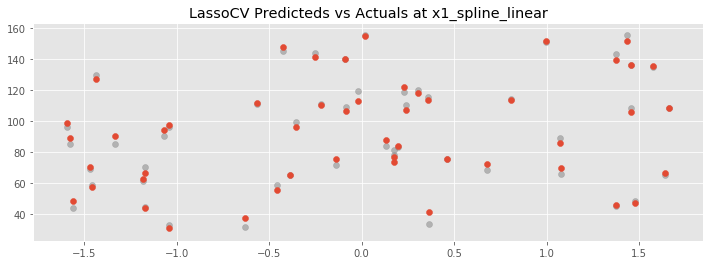

PLOT PREDICTED VS ACTUALS TIME: 0.23399782180786133


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


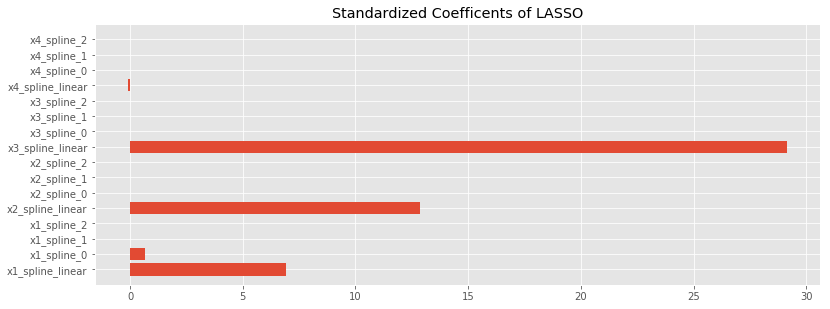

PLOT COEFFICIANTS TIME: 0.35179924964904785


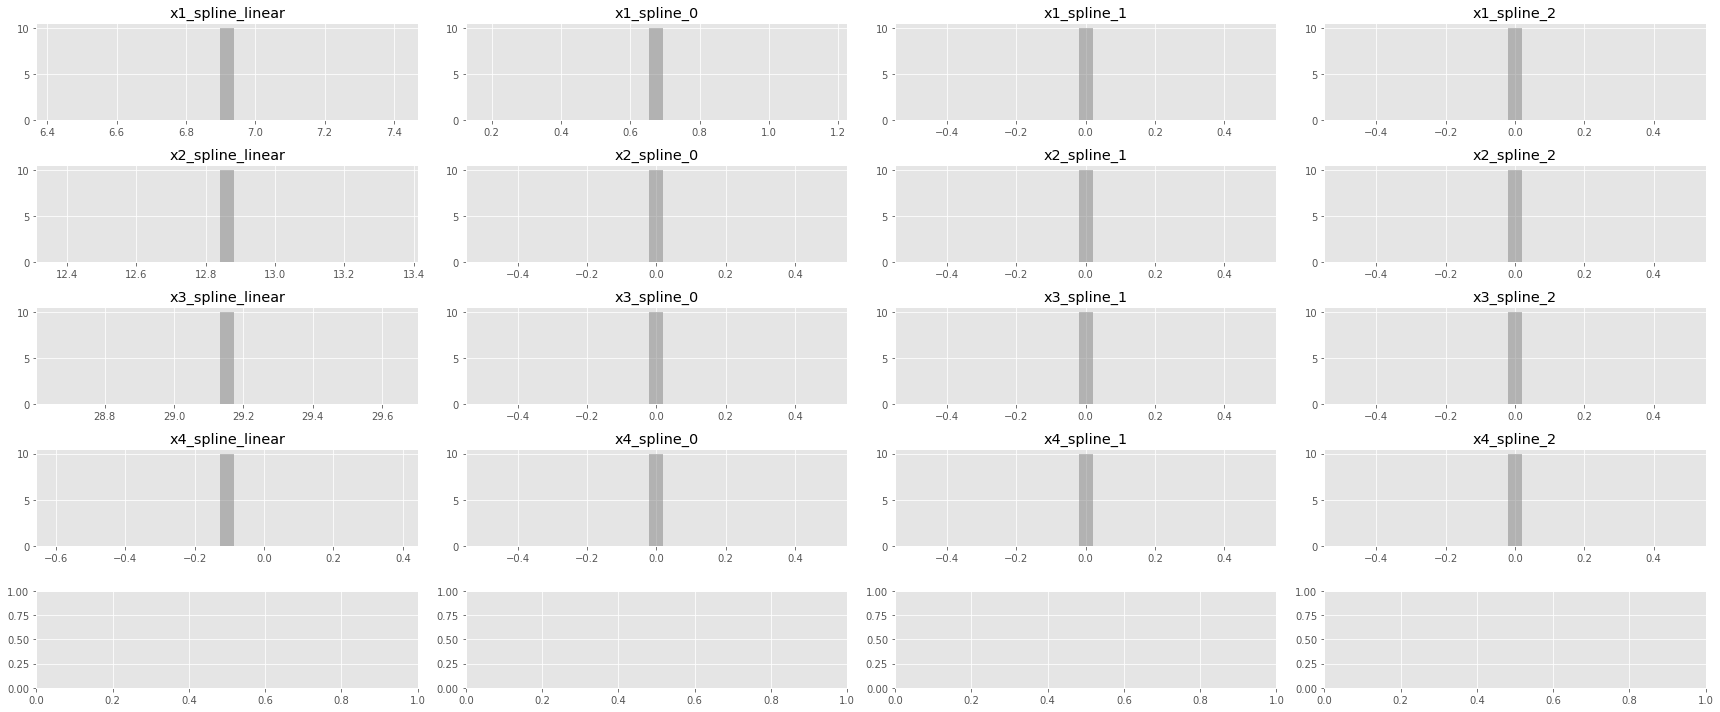

PLOT BOOTSTRAP COEFFICIANTS TIME: 3.5107920169830322


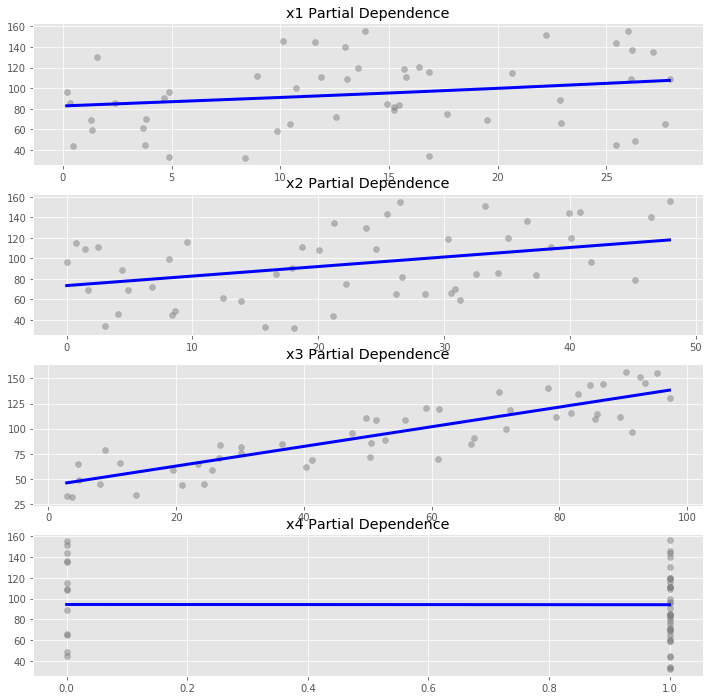

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 2.2779128551483154
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.002008199691772461


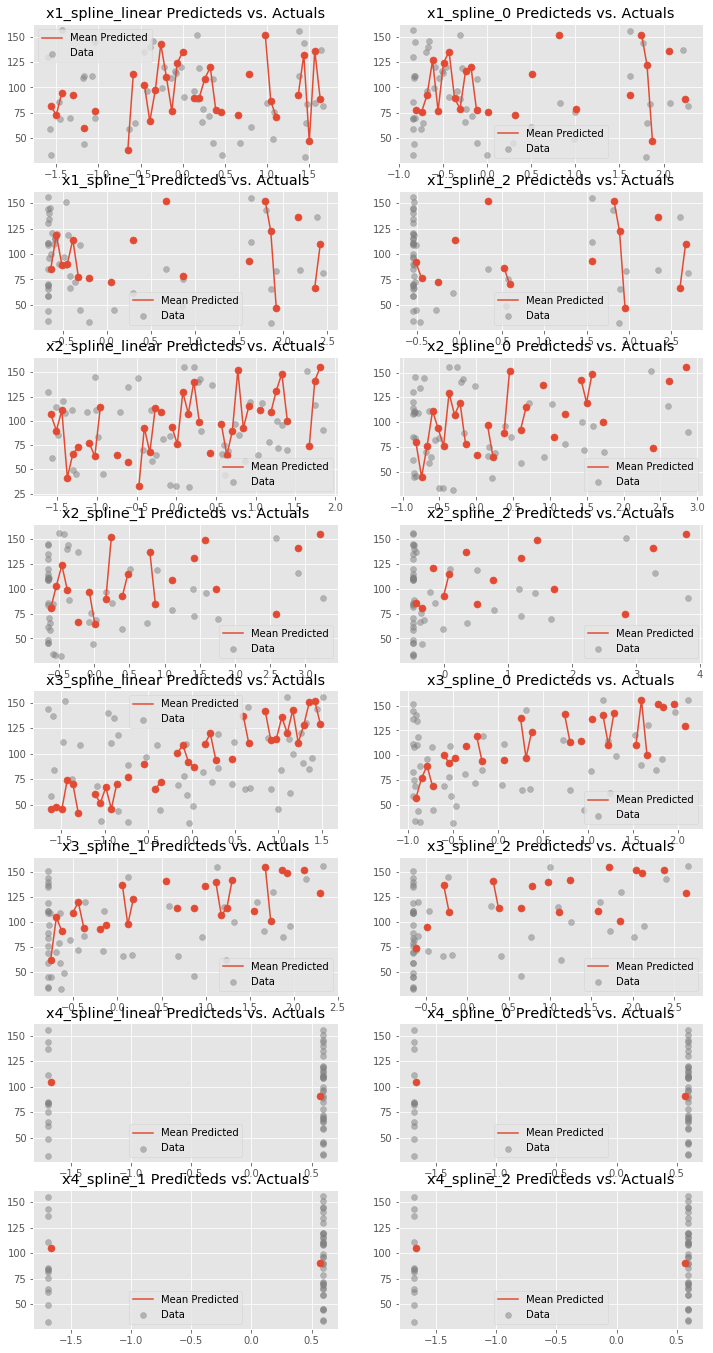

PLOT PREDICTEDS_VS_ACTUALS TIME: 3.015530824661255


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/autoregression/autoregression.py:358: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  galgraphs.plot_residual_error(ax, df_X_sample.values[:,0].reshape(-1), y.reshape(-1), y_hat_sample.reshape(-1), s=30);


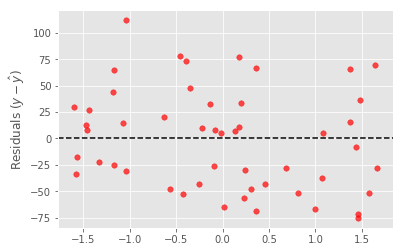

PLOT RESIDUAL ERROR TIME: 0.21927690505981445
LASSO: MSE = 12.02508795836088

 33%|███▎      | 2/6 [00:20<00:41, 10.32s/it]


DT: mean=-205.644274 std=113.390110
CV CALC TIME: 0.024773836135864258


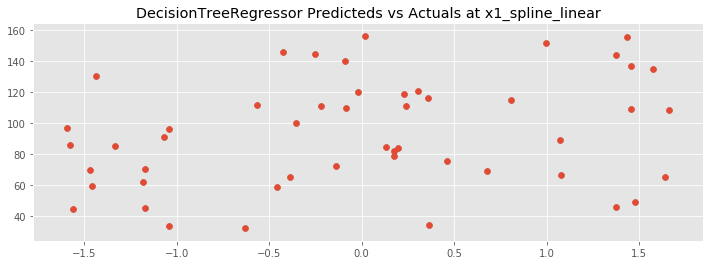

PLOT PREDICTED VS ACTUALS TIME: 0.22210383415222168


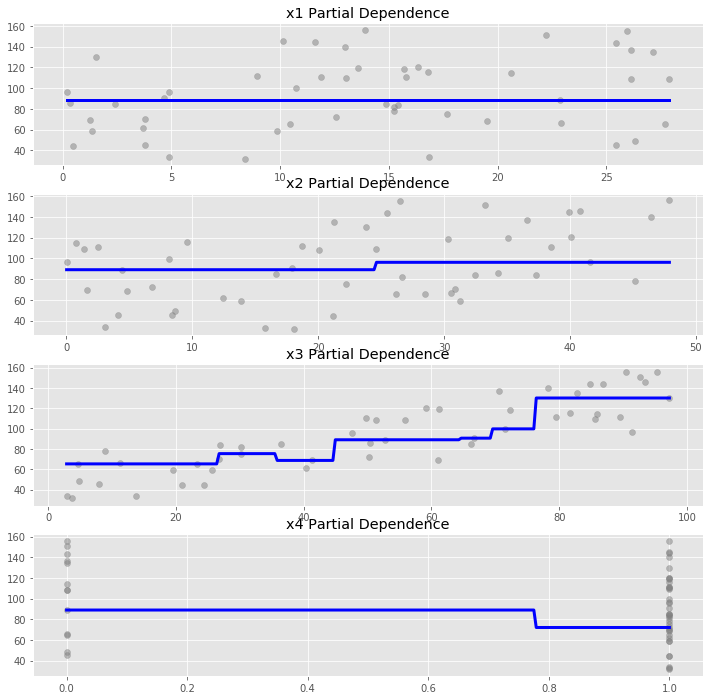

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 2.4263670444488525
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.0023238658905029297


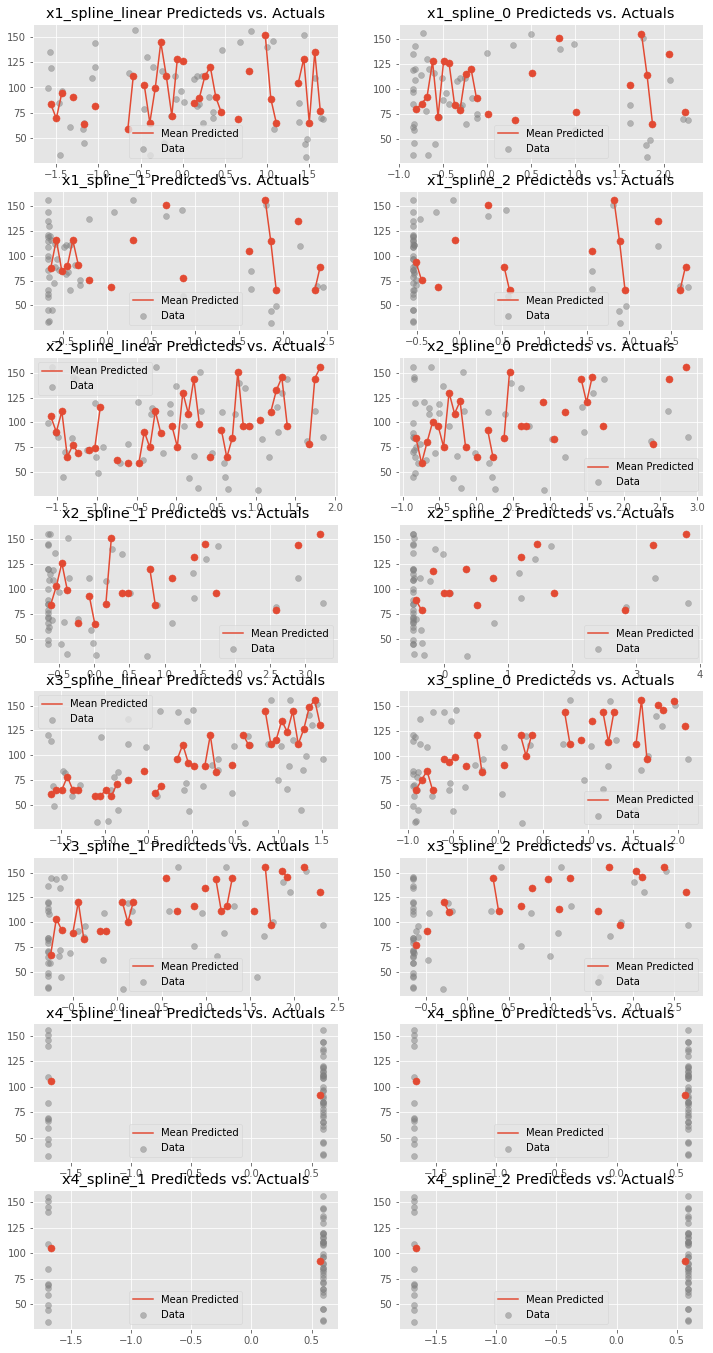

PLOT PREDICTEDS_VS_ACTUALS TIME: 3.895334243774414


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/autoregression/autoregression.py:358: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  galgraphs.plot_residual_error(ax, df_X_sample.values[:,0].reshape(-1), y.reshape(-1), y_hat_sample.reshape(-1), s=30);


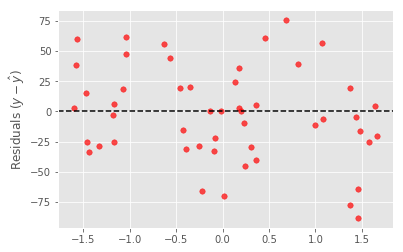

 50%|█████     | 3/6 [00:27<00:27,  9.17s/it]

PLOT RESIDUAL ERROR TIME: 0.2644999027252197
DT: MSE = 96.45690556750097
RF: mean=-128.198188 std=70.215672
CV CALC TIME: 0.17145514488220215


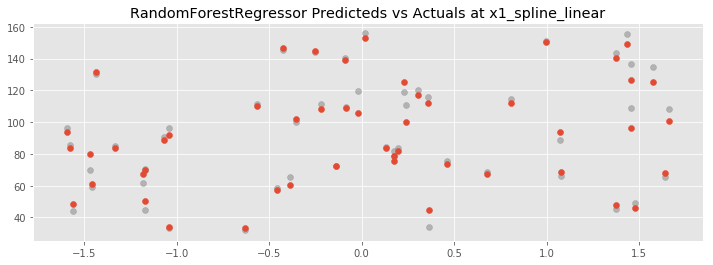

PLOT PREDICTED VS ACTUALS TIME: 0.22800087928771973


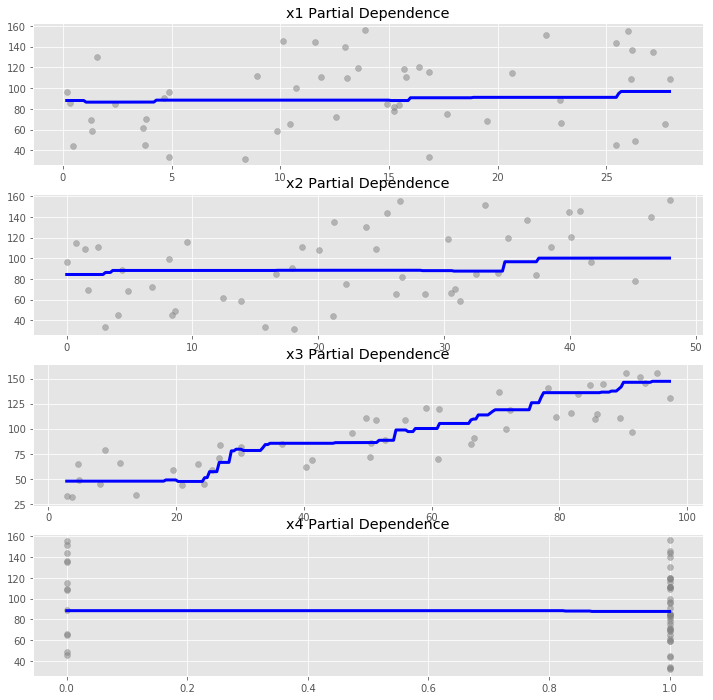

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 2.4188590049743652
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.003278970718383789


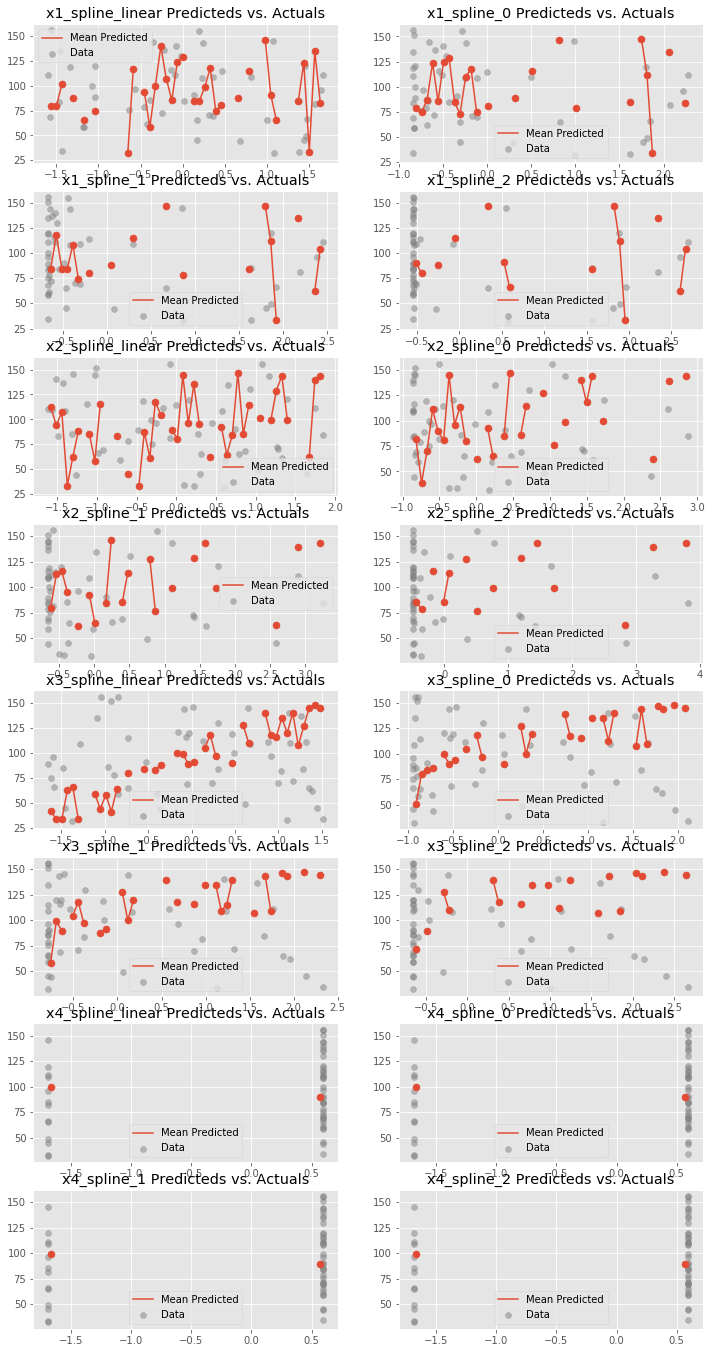

PLOT PREDICTEDS_VS_ACTUALS TIME: 3.1737477779388428


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/autoregression/autoregression.py:358: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  galgraphs.plot_residual_error(ax, df_X_sample.values[:,0].reshape(-1), y.reshape(-1), y_hat_sample.reshape(-1), s=30);


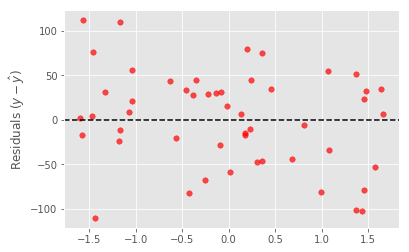

 67%|██████▋   | 4/6 [00:33<00:16,  8.49s/it]

PLOT RESIDUAL ERROR TIME: 0.18733906745910645
RF: MSE = 65.78617875848559
GB: mean=-85.930073 std=37.749935
CV CALC TIME: 0.2718222141265869


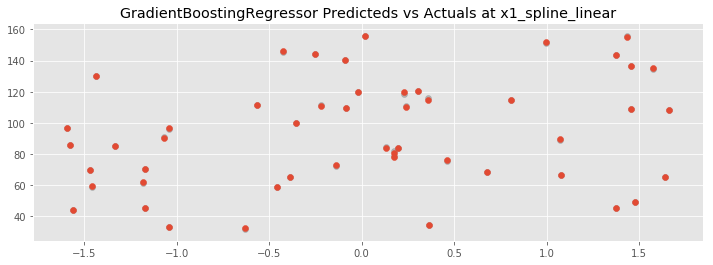

PLOT PREDICTED VS ACTUALS TIME: 0.2329089641571045


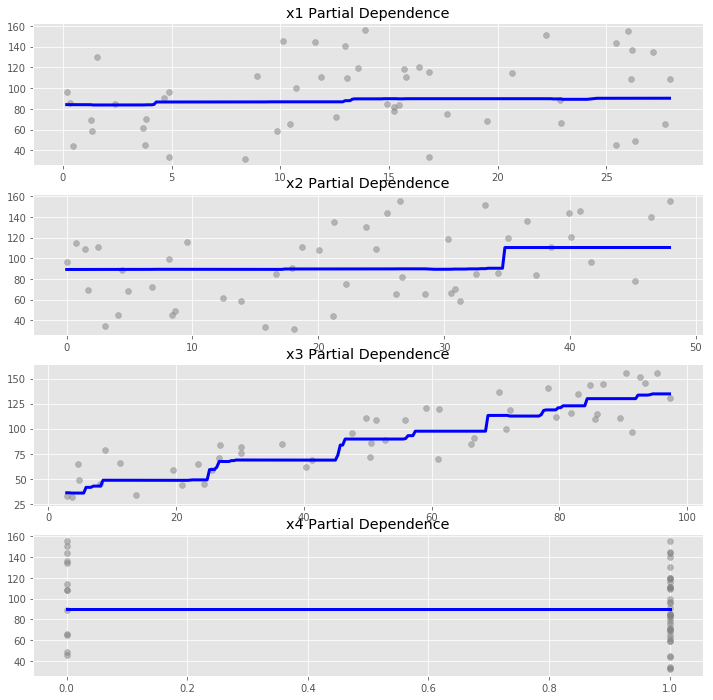

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 2.182959794998169
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.0017659664154052734


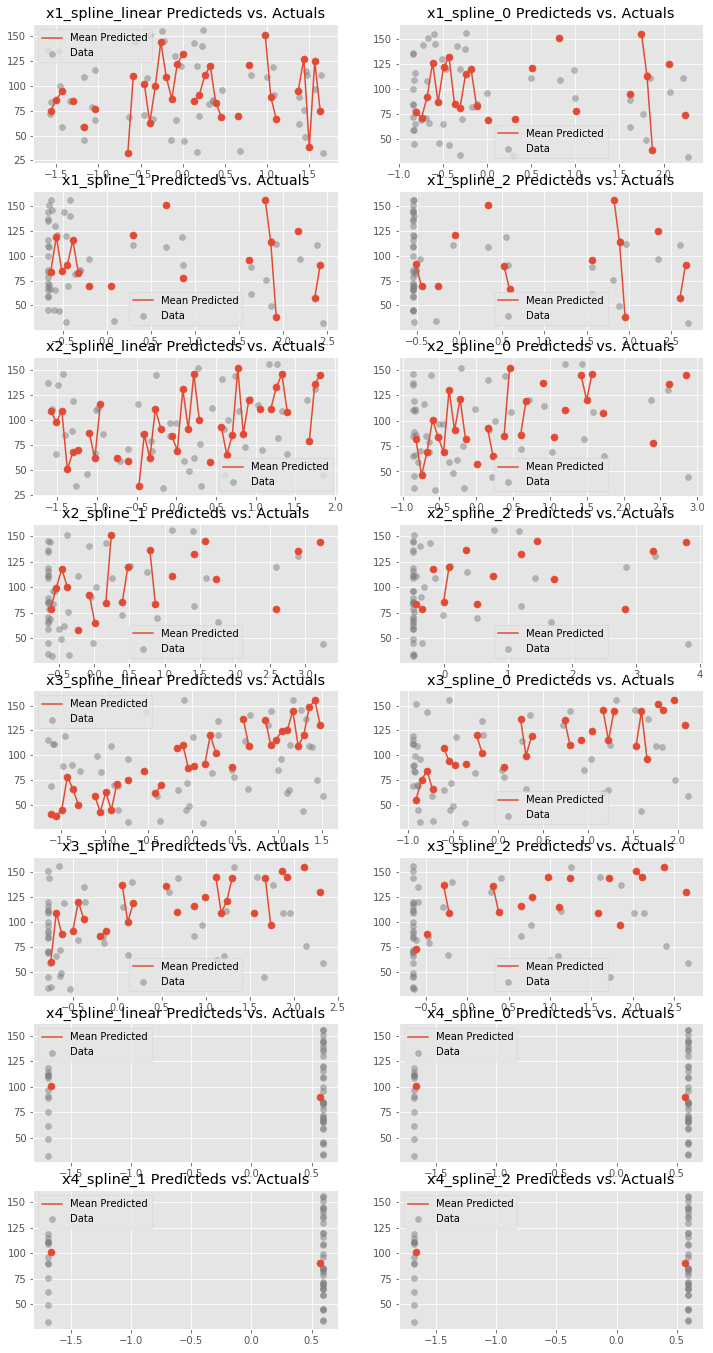

PLOT PREDICTEDS_VS_ACTUALS TIME: 2.8033111095428467


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/autoregression/autoregression.py:358: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  galgraphs.plot_residual_error(ax, df_X_sample.values[:,0].reshape(-1), y.reshape(-1), y_hat_sample.reshape(-1), s=30);


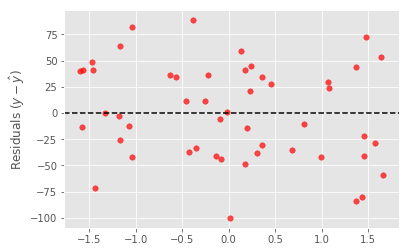

 83%|████████▎ | 5/6 [00:39<00:07,  7.99s/it]

PLOT RESIDUAL ERROR TIME: 0.24446582794189453
GB: MSE = 40.473468084073104
GB: mean=-144.530107 std=66.295452
CV CALC TIME: 0.7318897247314453


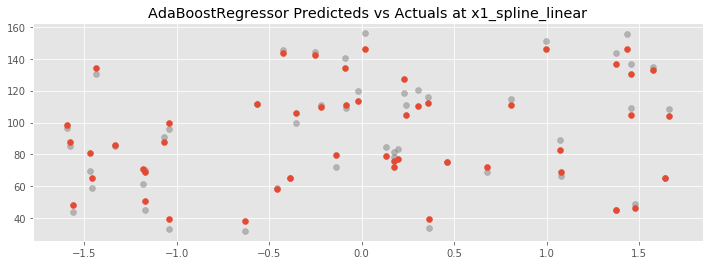

PLOT PREDICTED VS ACTUALS TIME: 0.21558308601379395


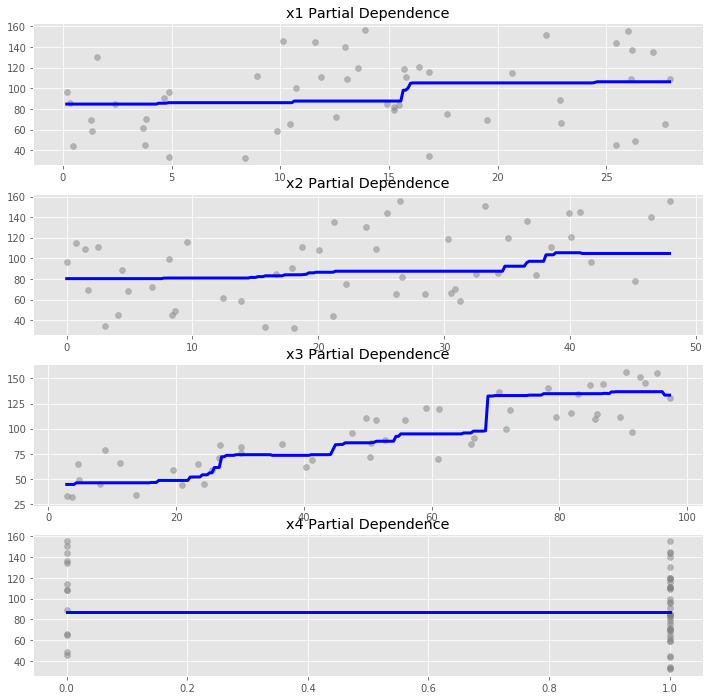

PLOT CONTINOUS PARTIAL DEPENDENCIES TIME: 2.2343590259552
PLOT CATEGORICAL PARTIAL DEPENDENCIES TIME: 0.002096891403198242


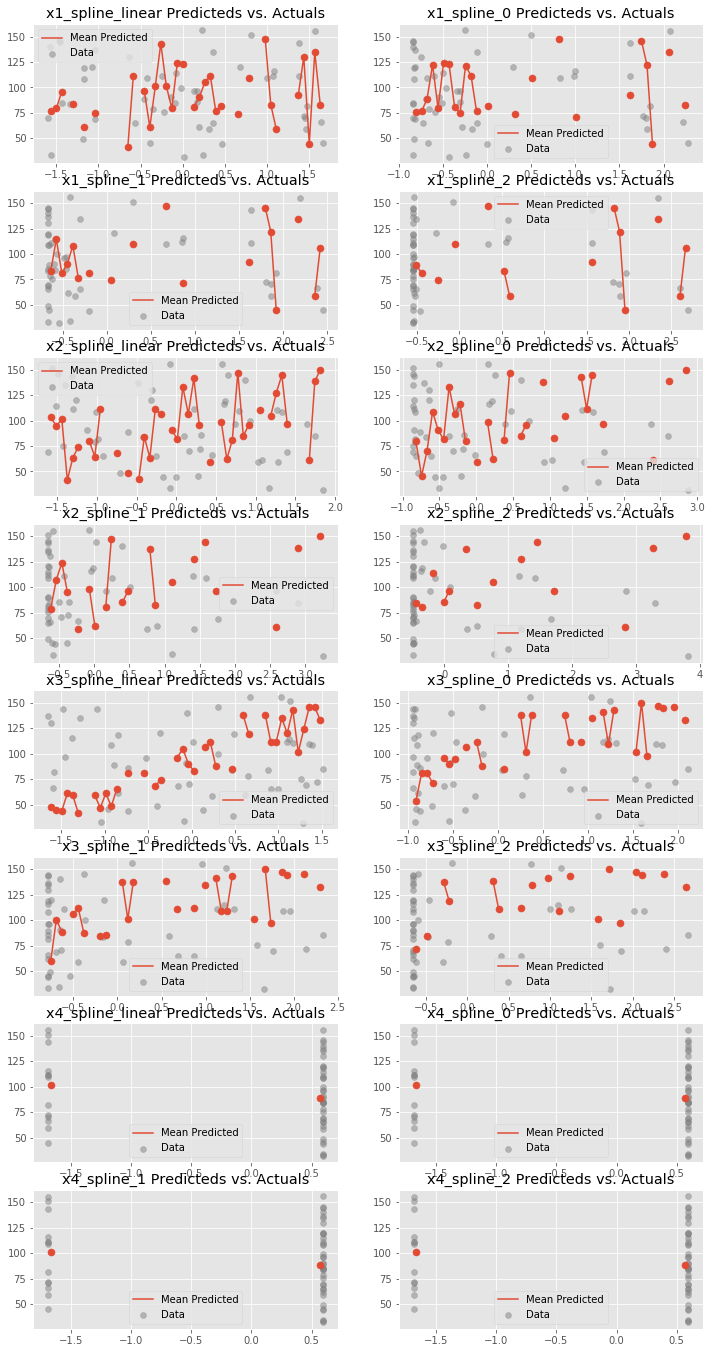

PLOT PREDICTEDS_VS_ACTUALS TIME: 2.586867332458496


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/autoregression/autoregression.py:358: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  galgraphs.plot_residual_error(ax, df_X_sample.values[:,0].reshape(-1), y.reshape(-1), y_hat_sample.reshape(-1), s=30);


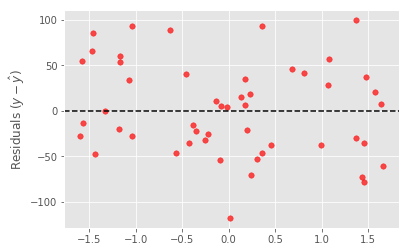

100%|██████████| 6/6 [00:46<00:00,  7.81s/it]


PLOT RESIDUAL ERROR TIME: 0.33690500259399414
GB: MSE = 50.497483098604164


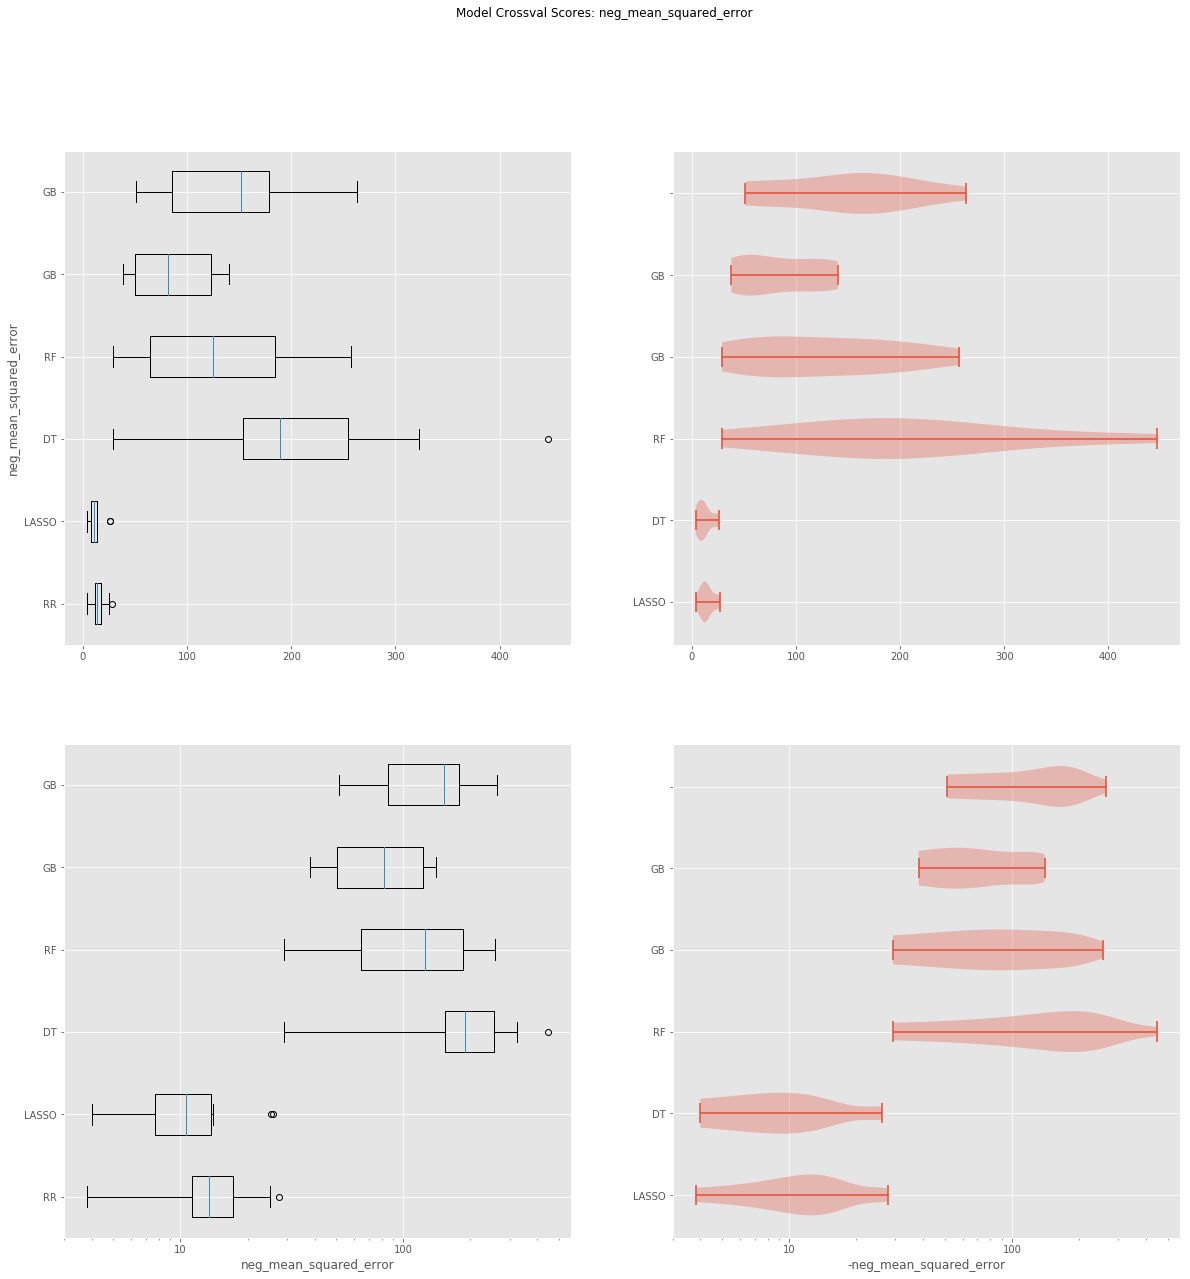

PLOT BAR AND VIOLIN TIME: 1.5080878734588623


In [12]:
import random
# balance_real = pd.read_csv("/Users/macbookpro/Dropbox/Galvanize/dsi-practical-linear-regression/data/balance.csv", index_col=0)
# iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

x1 = np.random.uniform(0,30,50)
x2 = np.random.uniform(0,50,50)
x3 = np.random.uniform(0,100,50)
y = x1 + x2 + x3 + np.random.uniform(0.0, 10, size=len(x1))
data = np.zeros((len(x1),4))
data[:,0] = x1
for i, col in enumerate([x1,x2,x3,y]):
    data[:,i] = col
df = pd.DataFrame(data, columns = ['x1','x2','x3','y'])
df['x4'] = df['x1']< 20
df['x4']=df['x4'].astype('float')
names3, results3, models3, pipeline3 = autoregression.compare_predictions(df,'y')

In [ ]:
results1

In [ ]:
is_continuous=True
if not is_continuous:
    print('Not continuosu')

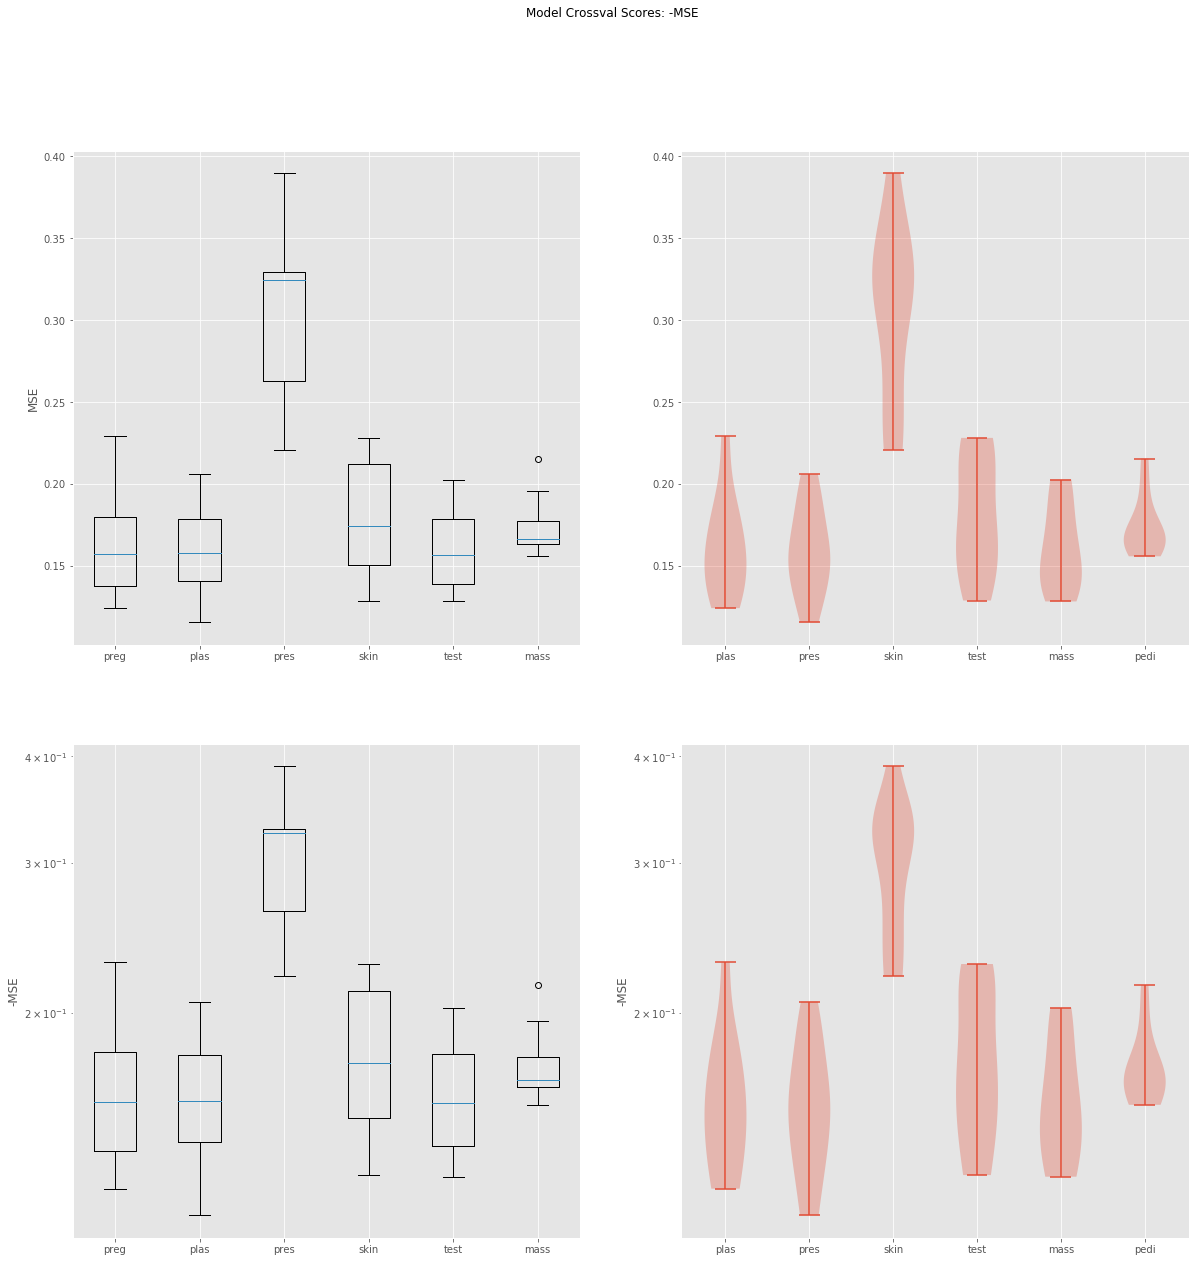

In [8]:
results= results2
scoring = 'MSE'

negresults = []
for i, result in enumerate(results):
    negresults.append(-1*result)
    
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
fig.suptitle(f'Model Crossval Scores: -{scoring}')
ax[0].set_ylabel(f'{scoring}')

import matplotlib
# BOX PLOTS
ax[0].boxplot(negresults)
ax[0].set_xticklabels(names)


# VIOLIN PLOTS
ax[1].violinplot(negresults)
ax[1].set_xticklabels(names)

#BOX PLOTS OF -LOG(ERROR)
logresults=[] 
ax[2].boxplot(negresults)
ax[2].set_xticklabels(names)
ax[2].set_ylabel(f'-{scoring}')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#VIOLIN PLOTS OF -LOG(ERROR)
logresults=[]
ax[3].violinplot(negresults)
ax[3].set_xticklabels(names)
ax[3].set_ylabel(f'-{scoring}')
ax[3].set_yscale('log')
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()


In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
fig.suptitle(f'Model Crossval Scores: {scoring}')
ax[0].set_ylabel(f'{scoring}')

# BOX PLOTS
ax[0].boxplot(results)
ax[0].set_xticklabels(names)

# VIOLIN PLOTS
ax[1].violinplot(results)
ax[1].set_xticklabels(names)

#BOX PLOTS OF -LOG(ERROR)
logresults=[] 
ax[2].boxplot(results)
ax[2].set_xticklabels(names)
ax[2].set_ylabel(f'{scoring}')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#VIOLIN PLOTS OF -LOG(ERROR)
logresults=[]
ax[3].violinplot(results, vert=False)
ax[3].set_yticklabels(names)
ax[3].set_xlabel(f'-{scoring}')
ax[3].set_xscale('log')
ax[3].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

# Machine sales Case study

In [ ]:
import cleandata

In [ ]:
def get_age_feature(df, datapoints):
    df = df.head(datapoints);
    df.saledate = pd.to_datetime(df.saledate)
    df.saledate = df.saledate.dt.year
    df['age'] = df.year_made - df.saledate
    df = df.drop('saledate', axis=1)
    df['age_too_old'] = df['age']<-500
    return df



train_datapoints=100
test_datapoints=10

# GET DATA
df_Train = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/Train.csv')
df_Train = cleandata.rename_columns(df_Train)
df_Train = get_age_feature(df_Train, train_datapoints)
df_Test = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/Test.csv')
df_Test = cleandata.rename_columns(df_Test)
df_Test = get_age_feature(df_Test, test_datapoints)
df_Train.sale_price = np.log(df_Train.sale_price)
df_actual_answers = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/do_not_open/test_soln.csv')
df_actual_answers = df_actual_answers[0:test_datapoints];

In [ ]:
y_var_name = 'sale_price'
(continuous_features, category_features) = autoregression.sort_features(df_Train.sample(n=500))
if y_var_name in continuous_features:
    continuous_features.remove(y_var_name)
while 5 < len(continuous_features):
    plot_sample_df = df_Train[[y_var_name] + continuous_features[:6]].sample(n=300)
    pd.scatter_matrix(plot_sample_df, figsize=(len(plot_sample_df)*.07,len(plot_sample_df)*.07))
    continuous_features = continuous_features[5:]
plot_sample_df = df_Train[[y_var_name] + continuous_features].sample(n=300)
pd.scatter_matrix(plot_sample_df, figsize=(len(plot_sample_df)*.1,len(plot_sample_df)*.1))
plt.show()

In [ ]:
df_Train.columns

In [ ]:
df_Train = df_Train[['sales_i_d', 'sale_price', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'differential_type', 'steering_controls', 'age',
       'age_too_old']]

In [ ]:
df_Test = df_Test[['sales_i_d', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'differential_type', 'steering_controls', 'age',
       'age_too_old']]

In [ ]:
def timeit(func, *args):
        start = time.time()
        answers = func(args)
        stop = time.time()
        print(f'{str(func.__name__).upper()} TIME: {stop-start}')
        return answers
timeit(sum, 1, 1)

In [ ]:
'hi'.upper()

In [ ]:
namesBIG, resultsBIG, modelsBIG, pipelineBIG = autoregression.compare_predictions(df=df_Train, y_var_name="sale_price", knots=5, univariates=False, bootstraps=5)

In [ ]:
names, results, models, pipeline = autoregression.compare_predictions(df=df_Train.head(100), y_var_name="sale_price", knots=5, univariates=True)

# All categorical: true false

In [71]:
df_ar = np.array([['a','b']*600,['a','a','b','c']*300, [True, False, False]*400]).T
df_ar

array([['a', 'a', 'True'],
       ['b', 'a', 'False'],
       ['a', 'b', 'False'],
       ..., 
       ['b', 'a', 'True'],
       ['a', 'b', 'False'],
       ['b', 'c', 'False']], 
      dtype='<U5')

In [72]:
df= pd.DataFrame(df_ar, columns=['cat1', 'cat2','tf'])
df

cat1 cat2     tf
0       a    a   True
1       b    a  False
2       a    b  False
3       b    c   True
4       a    a  False
5       b    a  False
6       a    b   True
7       b    c  False
8       a    a  False
9       b    a   True
10      a    b  False
11      b    c  False
12      a    a   True
13      b    a  False
14      a    b  False
15      b    c   True
16      a    a  False
17      b    a  False
18      a    b   True
19      b    c  False
20      a    a  False
21      b    a   True
22      a    b  False
23      b    c  False
24      a    a   True
25      b    a  False
26      a    b  False
27      b    c   True
28      a    a  False
29      b    a  False
...   ...  ...    ...
1170    a    b   True
1171    b    c  False
1172    a    a  False
1173    b    a   True
1174    a    b  False
1175    b    c  False
1176    a    a   True
1177    b    a  False
1178    a    b  False
1179    b    c   True
1180    a    a  False
1181    b    a  False
1182    a    b   True
1183    b    c  False
1184    a    a  False
1185    b    a   True
1186    a    b  False
1187    b    c  False
1188    a    a   True
1189    b    a  False
1190    a    b  False
1191    b    c   True
1192    a    a  False
1193    b    a  False
1194    a    b   True
1195    b    c  False
1196    a    a  False
1197    b    a   True
1198    a    b  False
1199    b    c  False

[1200 rows x 3 columns]

In [73]:
names2, results2, models2, pipeline2 = autoregression.compare_predictions(df, 'tf', univariates=False)

'percent_data' NOT SPECIFIED AND len(df)=(1200)
                  IS > 1000: TAKING A RANDOM %10 OF THE SAMPLE
MAKE SUBSAMPLE TIME: 0.0007579326629638672
CLEAN_DF TIME: 0.026046037673950195


ZeroDivisionError: division by zero

In [64]:
df.corr()

Empty DataFrame
Columns: []
Index: []